In [1]:
import datetime
print(datetime.datetime.now())

2019-11-09 20:45:55.586145


In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
!pip install plotly
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

!pip install pandas_profiling
import pandas_profiling

from sklearn import preprocessing

import itertools

!pip install yellowbrick
import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
!pip install kmodes
from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Read in Data

In [101]:
# Get dataset
df = pd.read_csv("/Volumes/Mahesh/MMAI 869 - Machine Learning and AI Technology - 11102019 - 611 PM/jewelry_customers.csv")

# Standardise the data
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

list(scaled_df)
scaled_df.shape
scaled_df.info()
scaled_df.dtypes
scaled_df.isnull().sum()
scaled_df.describe().transpose()
scaled_df.head(n=20)
scaled_df.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null float64
Income           505 non-null float64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(4)
memory usage: 15.9 KB


Age              float64
Income           float64
SpendingScore    float64
Savings          float64
dtype: object

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

count          mean       std       min       25%       50%  \
Age            505.0  5.672031e-17  1.000992 -1.742394 -1.037472 -0.000821   
Income         505.0 -2.638154e-17  1.000992 -1.766355 -1.139805 -0.012106   
SpendingScore  505.0 -1.954432e-16  1.000992 -1.947295 -0.772201 -0.527678   
Savings        505.0 -4.058360e-16  1.000992 -2.399206 -1.018085  0.474782   

                    75%       max  
Age            1.077295  1.574888  
Income         0.878451  1.849048  
SpendingScore  1.014725  1.908103  
Savings        0.846387  1.645835

Age    Income  SpendingScore   Savings
0  -0.042287  0.062733       1.103593 -1.072467
1  -0.000821  0.174811       1.102641 -1.303473
2   0.123577 -0.021200       0.761727 -0.526556
3  -0.000821 -0.031712       1.004705 -0.913395
4   1.160228 -1.606165      -0.602619  1.012686
5  -1.244802  1.559204       1.318359 -1.684141
6  -0.208151  0.027441       1.079955 -1.007937
7   1.160228 -0.915567      -0.577512  1.258782
8   0.994363 -1.143838      -0.695375  0.590763
9   1.035829 -1.329920      -0.532121  1.216971
10  1.077295  0.997732      -1.805434  0.838695
11 -0.954540  0.674876      -0.923947  0.917404
12 -1.203336  0.679576      -0.618419  0.355798
13 -1.161870  0.902452      -0.827269  0.312404
14  0.082111 -0.099571       1.307073 -0.776698
15  1.367558  1.317278      -1.713180  0.373603
16 -0.166685 -0.108248       0.957141 -0.825566
17  1.160228 -1.224573      -0.723499  0.873371
18  0.952897 -1.164641      -0.513924  1.214397
19  1.201694  1.256066      -1.703353  0.485813

Age    Income  SpendingScore   Savings
500 -1.286268  0.714535      -0.453557  0.621787
501  1.409024 -1.545704      -1.164109  1.235201
502  1.284626 -1.118447      -0.578054  0.855313
503  1.326092 -1.524929      -0.579866  1.322452
504  1.243160 -1.258335      -0.831890  0.510463

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

[Text(0, 1, 'Age'),
 Text(0, 1, 'Income'),
 Text(0, 1, 'SpendingScore'),
 Text(0, 1, 'Savings'),
 Text(0, 1, 'label3')]

[Text(0, 0, 'Age'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'SpendingScore'),
 Text(0, 0, 'Savings'),
 Text(0, 0, 'label3')]

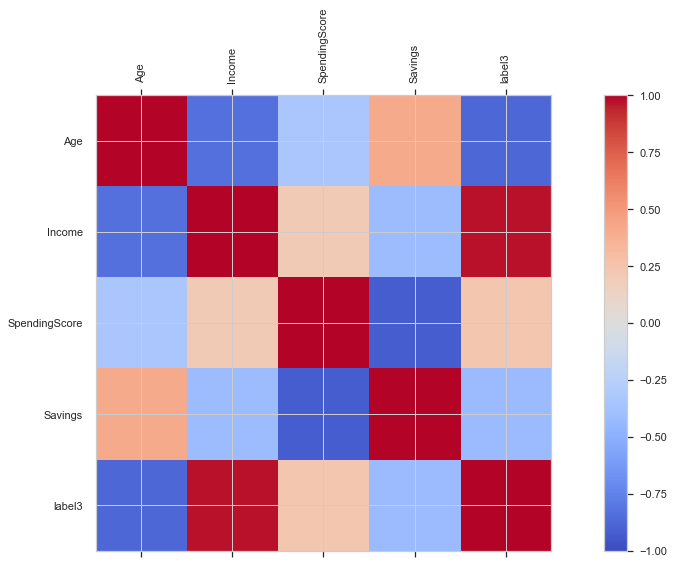

In [95]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Text(0.5, 1, 'Heatmap for the Data')

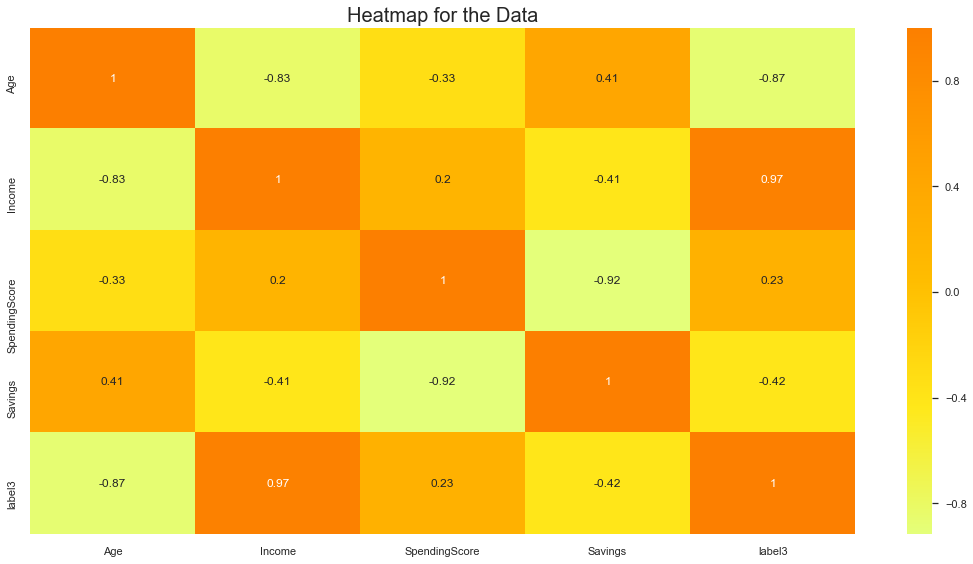

In [90]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(scaled_df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

# Visualizing Data to analyse the Distribution

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Distplot of Age')

Text(0.5, 1.0, 'Distplot of Income')

Text(0.5, 1.0, 'Distplot of SpendingScore')

Text(0.5, 1.0, 'Distplot of Savings')

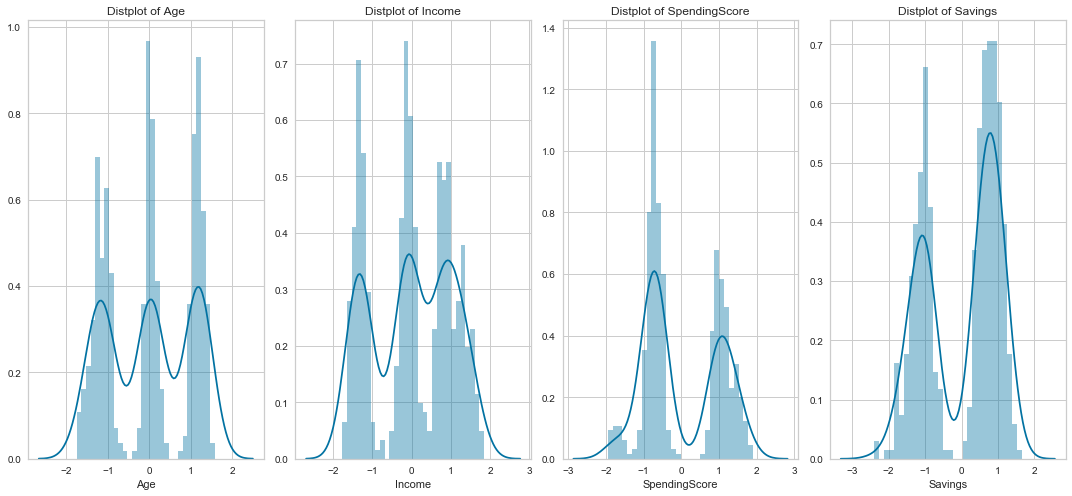

In [17]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Income' , 'SpendingScore','Savings']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(scaled_df[x] , bins = 30)
    plt.title('Distplot of {}'.format(x))
plt.show()

Text(0.5, 1, 'Pairplot for the Data')

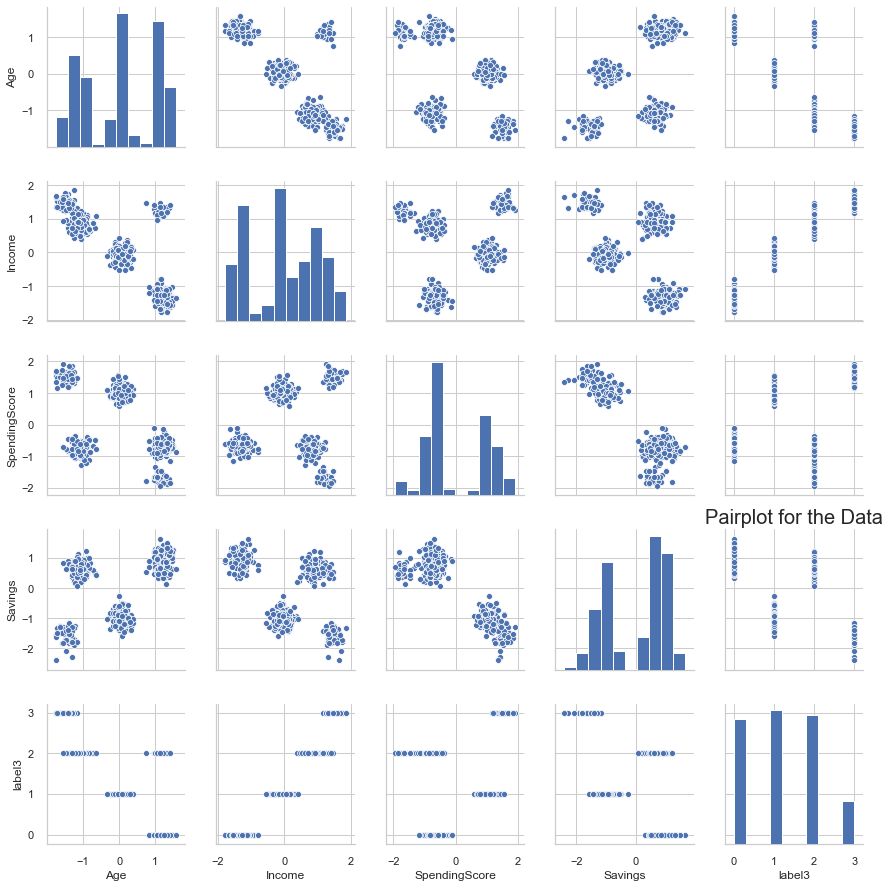

In [81]:
sns.pairplot(scaled_df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Distribution of Income')

Text(0.5, 0, 'Range of Income')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Age')

Text(0.5, 0, 'Range of Age')

Text(0, 0.5, 'Count')

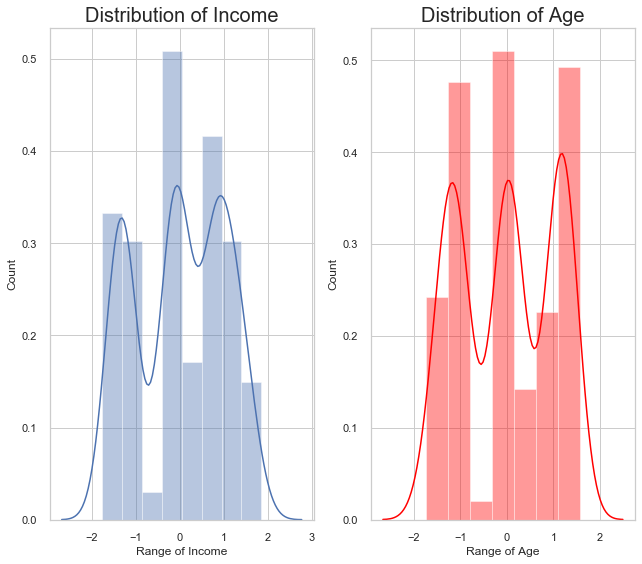

Text(0.5, 1.0, 'Distribution of SpendingScore')

Text(0.5, 0, 'Range of SpendingScore')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Savings')

Text(0.5, 0, 'Range of Savings')

Text(0, 0.5, 'Count')

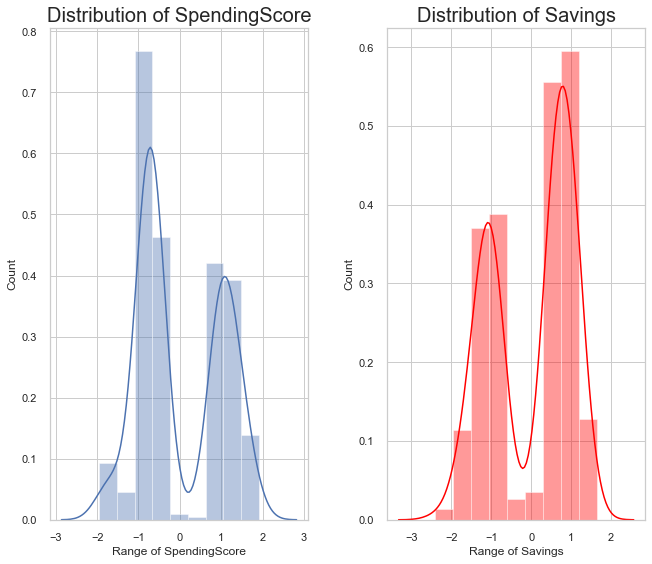

In [86]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 4, 1)
sns.set(style = 'whitegrid')
sns.distplot(scaled_df['Income'])
plt.title('Distribution of Income', fontsize = 20)
plt.xlabel('Range of Income')
plt.ylabel('Count')


plt.subplot(1, 4, 2)
sns.set(style = 'whitegrid')
sns.distplot(scaled_df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

plt.subplot(1, 4, 3)
sns.set(style = 'whitegrid')
sns.distplot(scaled_df['SpendingScore'])
plt.title('Distribution of SpendingScore', fontsize = 20)
plt.xlabel('Range of SpendingScore')
plt.ylabel('Count')


plt.subplot(1, 4, 4)
sns.set(style = 'whitegrid')
sns.distplot(scaled_df['Savings'], color = 'red')
plt.title('Distribution of Savings', fontsize = 20)
plt.xlabel('Range of Savings')
plt.ylabel('Count')
plt.show()

<Figure size 1080x504 with 0 Axes>

Text(0, 0.5, 'Age')

Text(0, 0.5, 'Income')

Text(0, 0.5, 'SpendingScore')

Text(0, 0.5, 'Savings')

Text(0, 0.5, 'Age')

Text(0, 0.5, 'Income')

Text(0, 0.5, 'SpendingScore')

Text(0, 0.5, 'Savings')

Text(0, 0.5, 'Age')

Text(0, 0.5, 'Income')

Text(0, 0.5, 'SpendingScore')

Text(0, 0.5, 'Savings')

Text(0, 0.5, 'Age')

Text(0, 0.5, 'Income')

Text(0, 0.5, 'SpendingScore')

Text(0, 0.5, 'Savings')

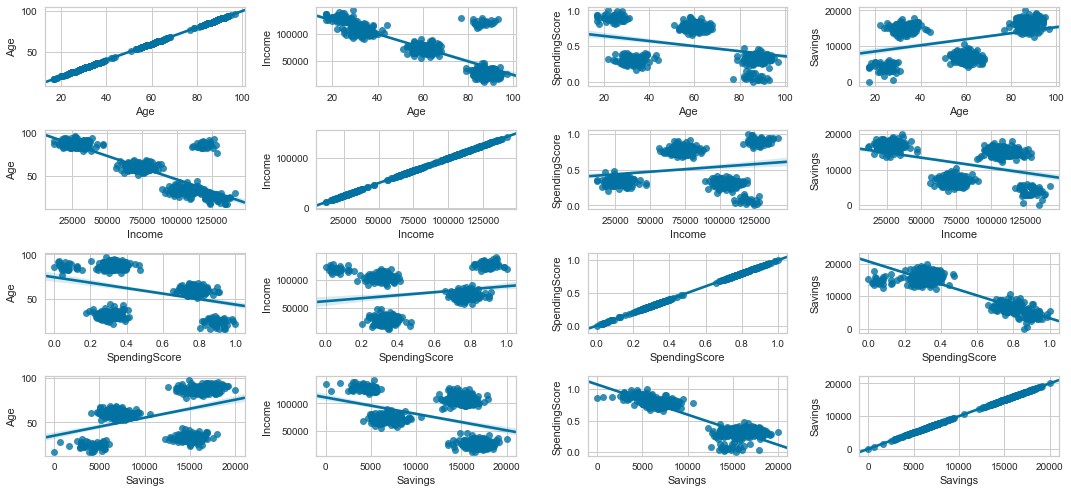

In [18]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Income' , 'SpendingScore','Savings']:
    for y in ['Age' , 'Income' , 'SpendingScore','Savings']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [22]:
'''Age and Income'''
X1 = scaled_df[['Age' , 'Income']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

'Age and Income'

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

<Figure size 1080x432 with 0 Axes>

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

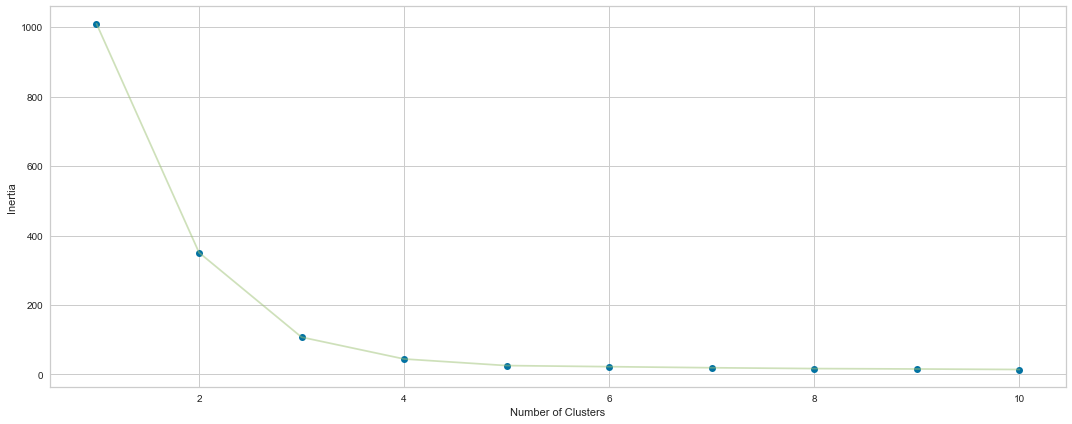

In [23]:
#Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [36]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [37]:


x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

(Text(0, 0.5, 'Income'), Text(0.5, 0, 'Age'))

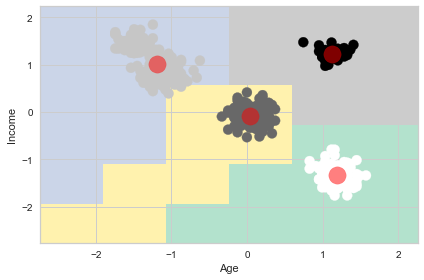

In [38]:
#Segmentation using Age and Income
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Income' , data = scaled_df , c = labels1 , 
            s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Income') , plt.xlabel('Age')
plt.show()

# Segmentation using Income and Spending Score

In [66]:
'''Income and spendingScore'''
X2 = scaled_df[['Income' , 'SpendingScore']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

'Income and spendingScore'

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

<Figure size 1080x432 with 0 Axes>

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

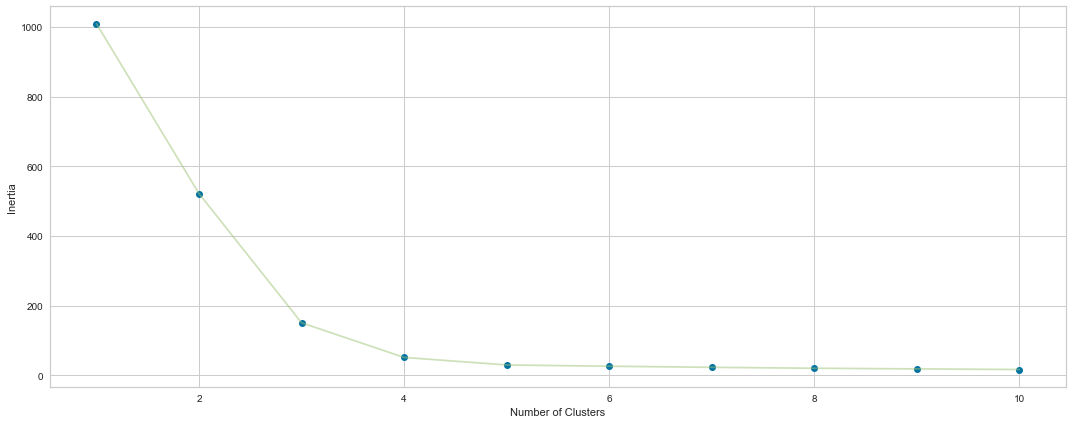

In [67]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [69]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [71]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

<Figure size 1080x504 with 0 Axes>

(Text(0, 0.5, 'SpendingScore'), Text(0.5, 0, 'Income'))

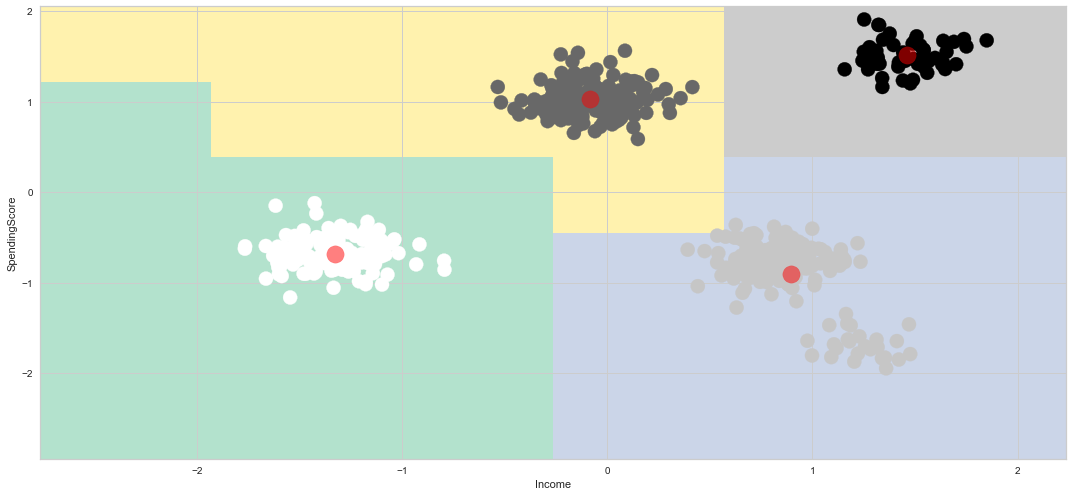

In [72]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income' ,y = 'SpendingScore' , data = scaled_df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('SpendingScore') , plt.xlabel('Income')
plt.show()

In [73]:
X3 = scaled_df[['Age' , 'Income' ,'SpendingScore','Savings']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

<Figure size 1080x432 with 0 Axes>

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

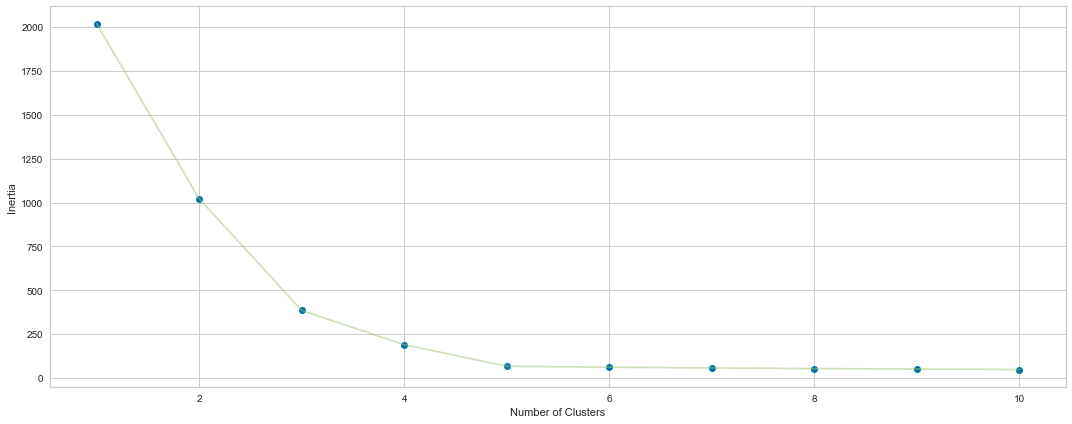

In [74]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [113]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [114]:
scaled_df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= scaled_df['Age'],
    y= scaled_df['SpendingScore'],
    z= scaled_df['Income'],
    mode='markers',
     marker=dict(
        color = scaled_df['label3'], 
        size= 20,
        line=dict(
            color= scaled_df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'SpendingScore'),
            zaxis = dict(title  = 'Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Internal Validation Metrics

In [118]:
silhouette_score(scaled_df, algorithm.labels_)

0.7928374694305527

In [123]:
#sklearn.metrics.davies_bouldin_score(scaled_df, algorithm.labels_)
visualizer = SilhouetteVisualizer(algorithm)
visualizer.fit(scaled_df)
visualizer.poof()
fig = visualizer.ax.get_figure()
#fig.savefig('out/scaled_df-4-silhouette.png', transparent=False);

ValueError: Incorrect number of features. Got 5 features, expected 4

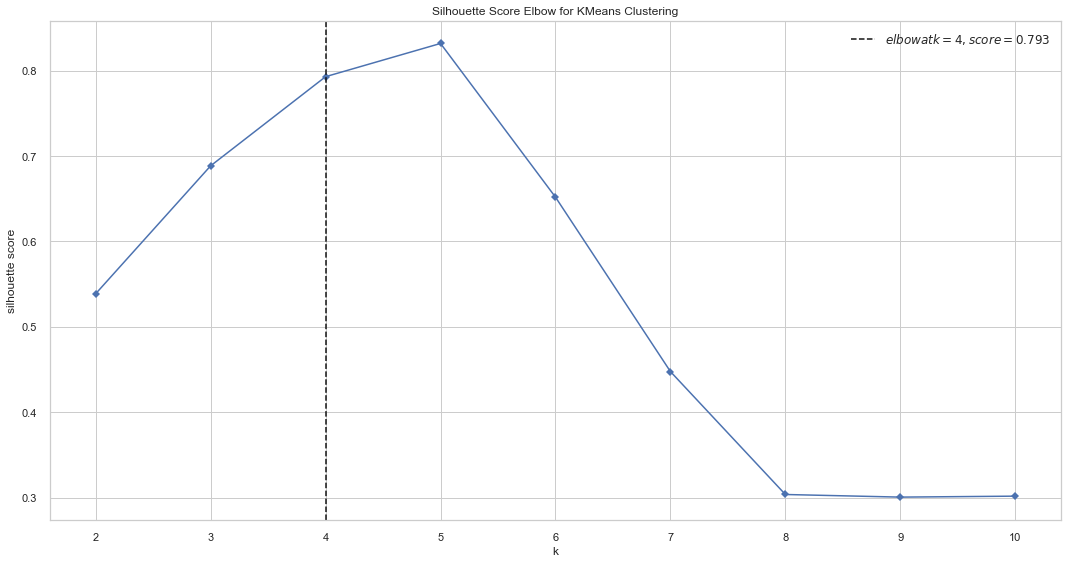

YellowbrickValueError: '{}' is not a defined metric use one of distortion, silhouette, or calinski_harabasz

In [124]:
model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(scaled_df).poof();
KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False).fit(scaled_df).poof();
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(scaled_df).poof();

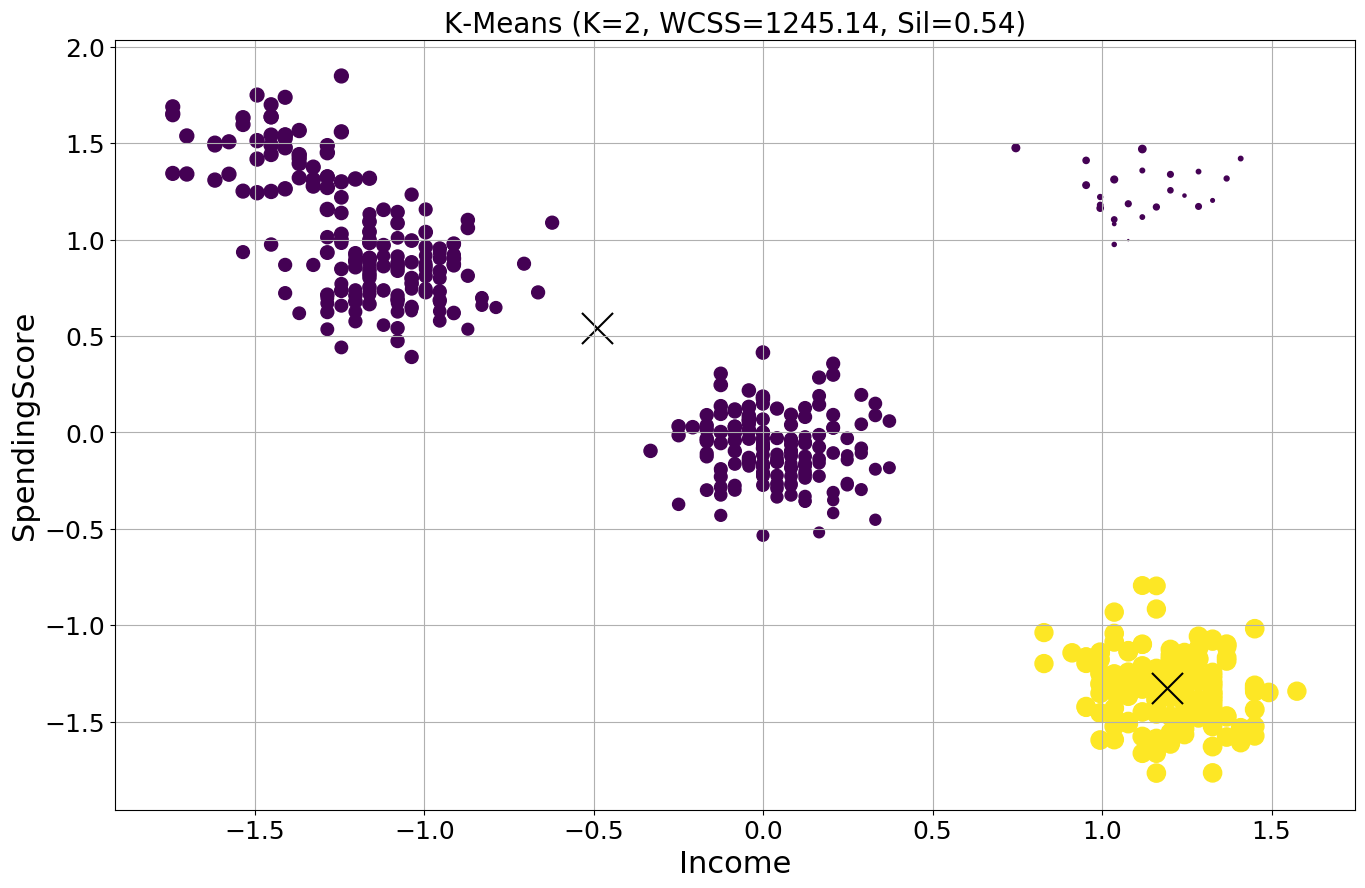

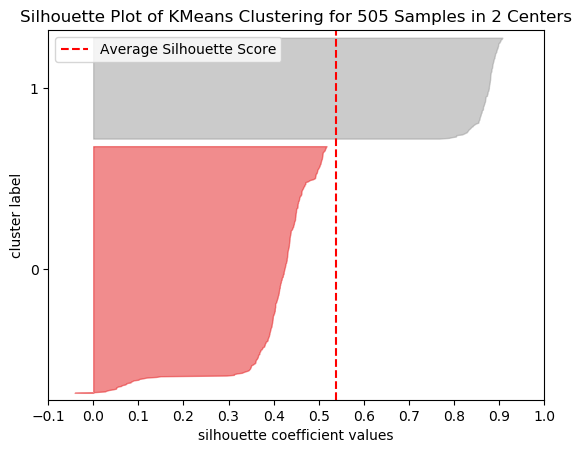

K=2, WCSS=1245.14, Sil=0.54


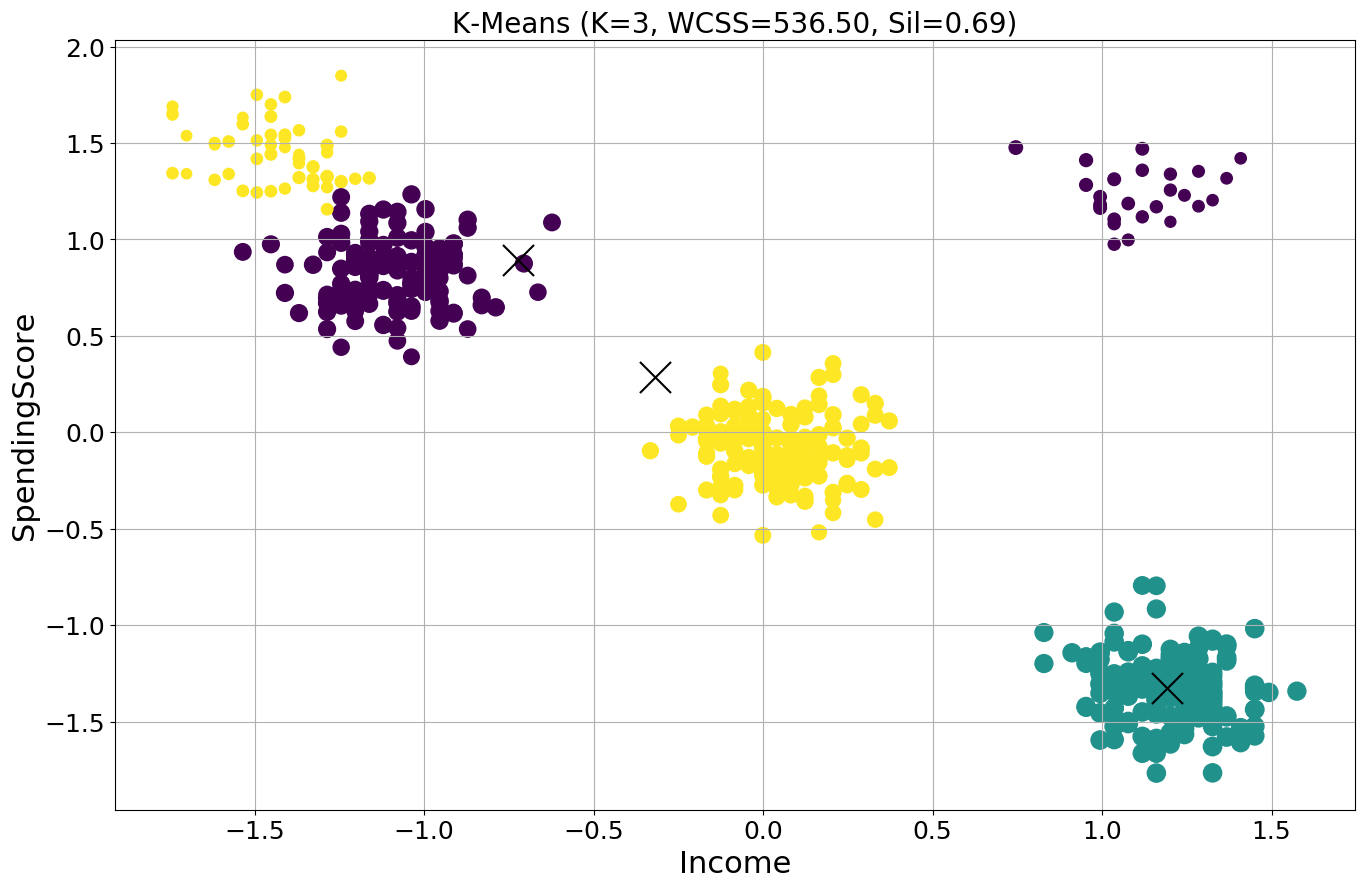

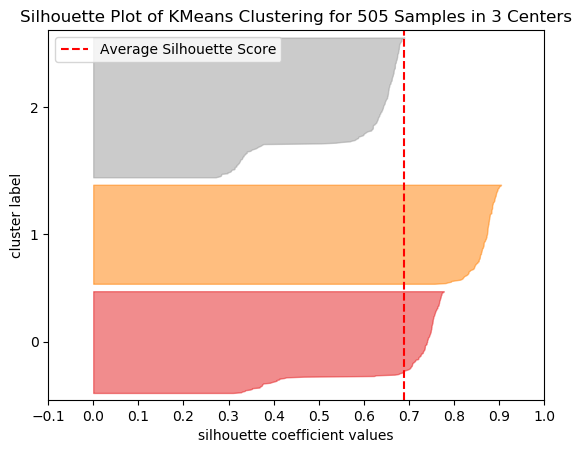

K=3, WCSS=536.50, Sil=0.69


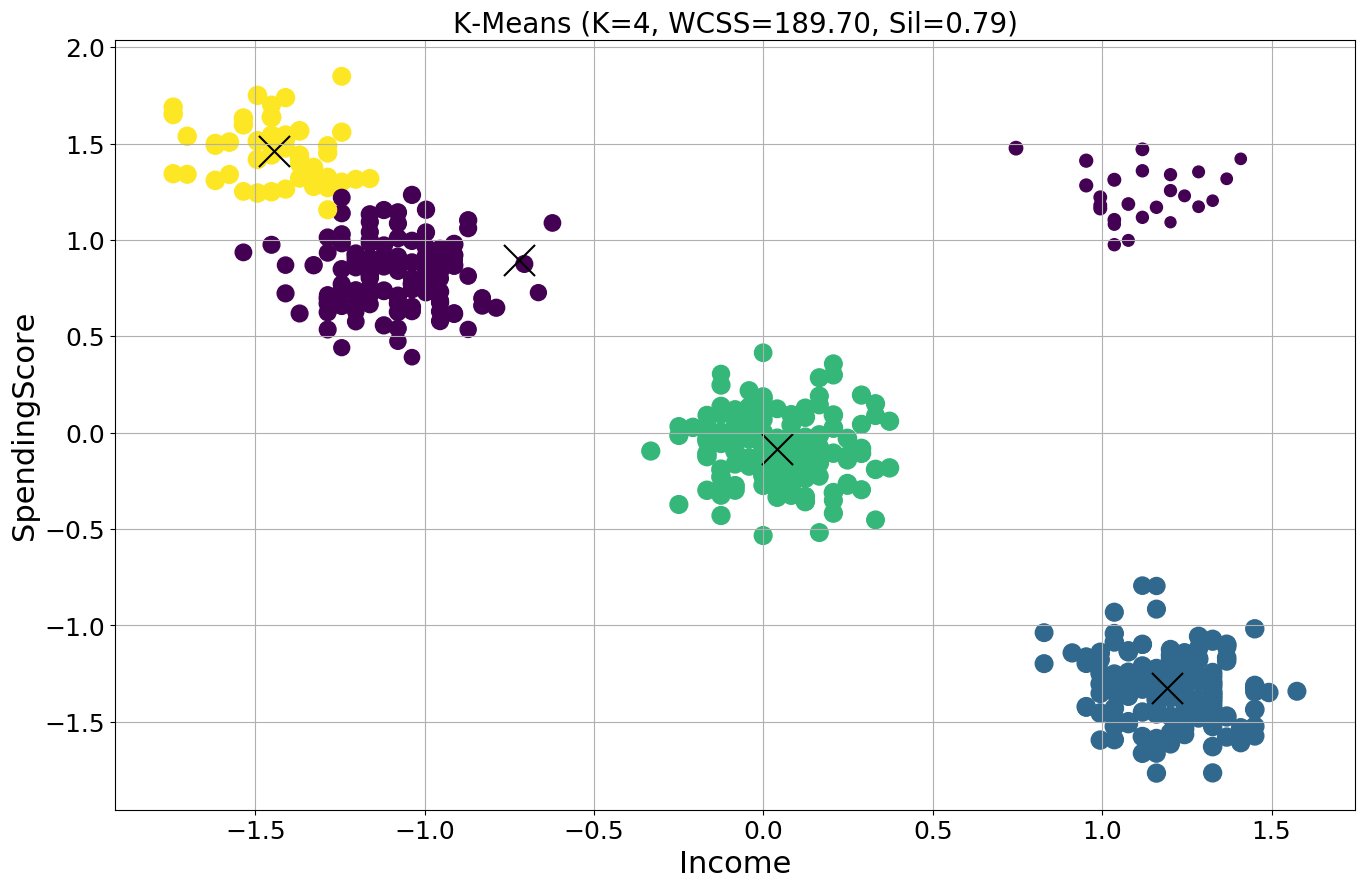

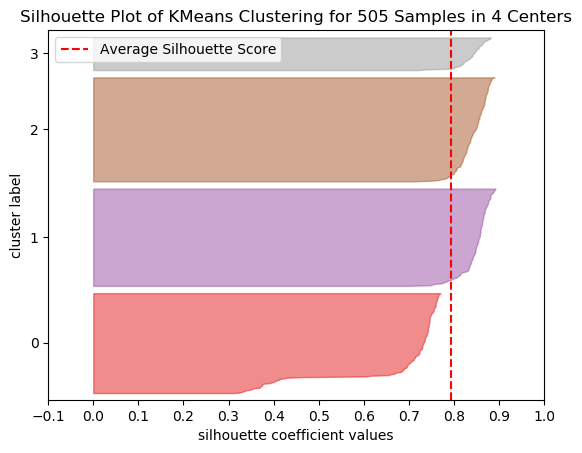

K=4, WCSS=189.70, Sil=0.79


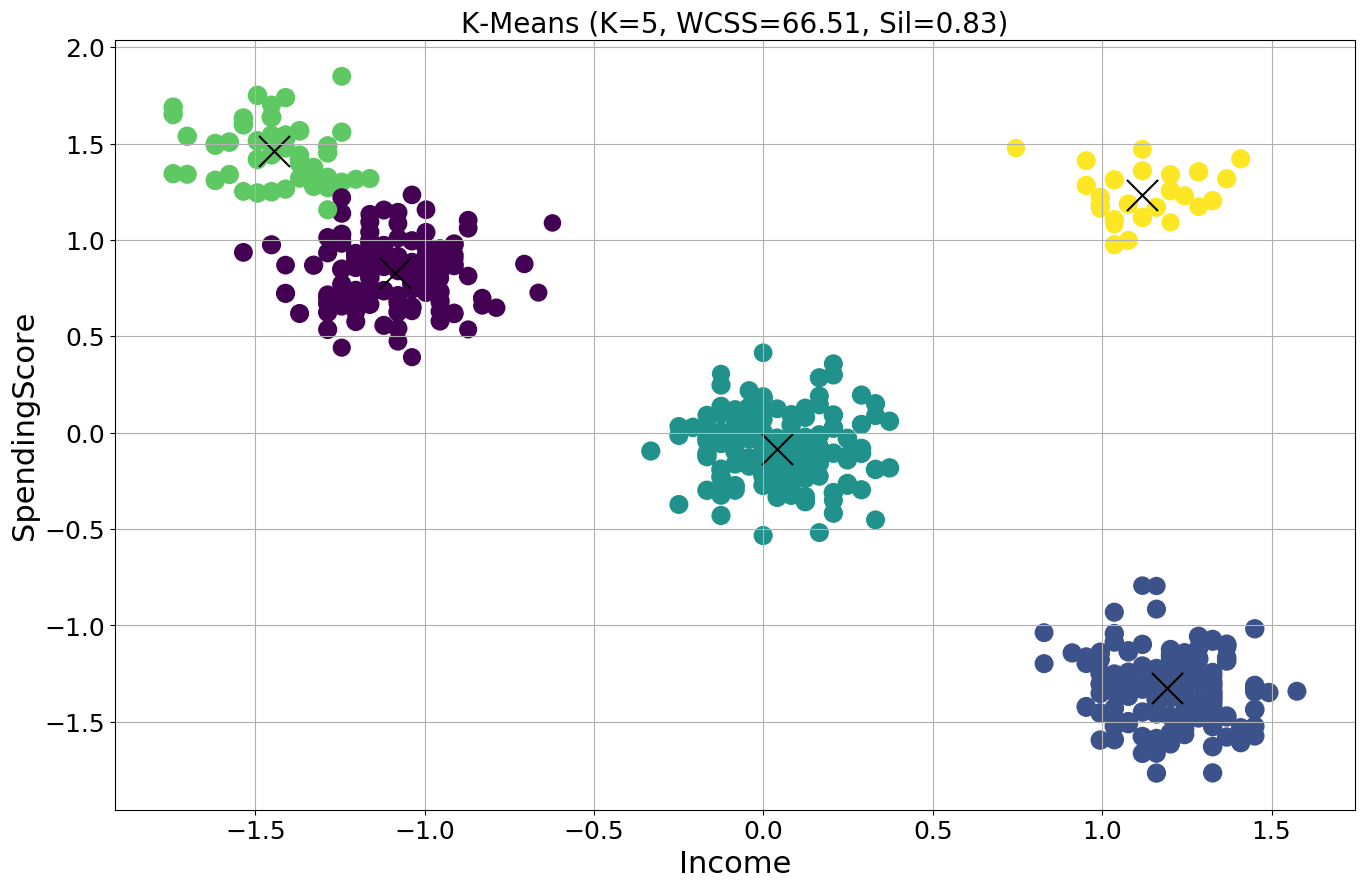

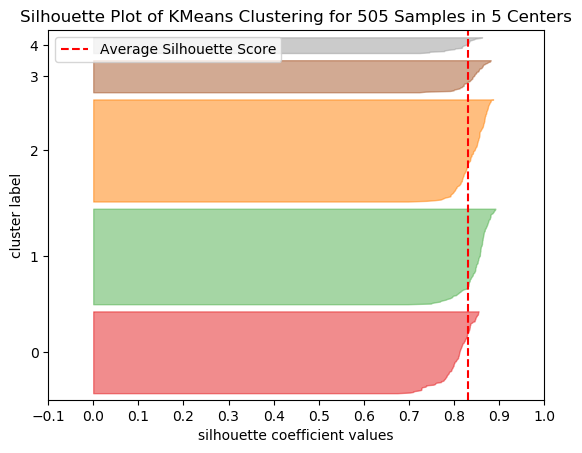

K=5, WCSS=66.51, Sil=0.83


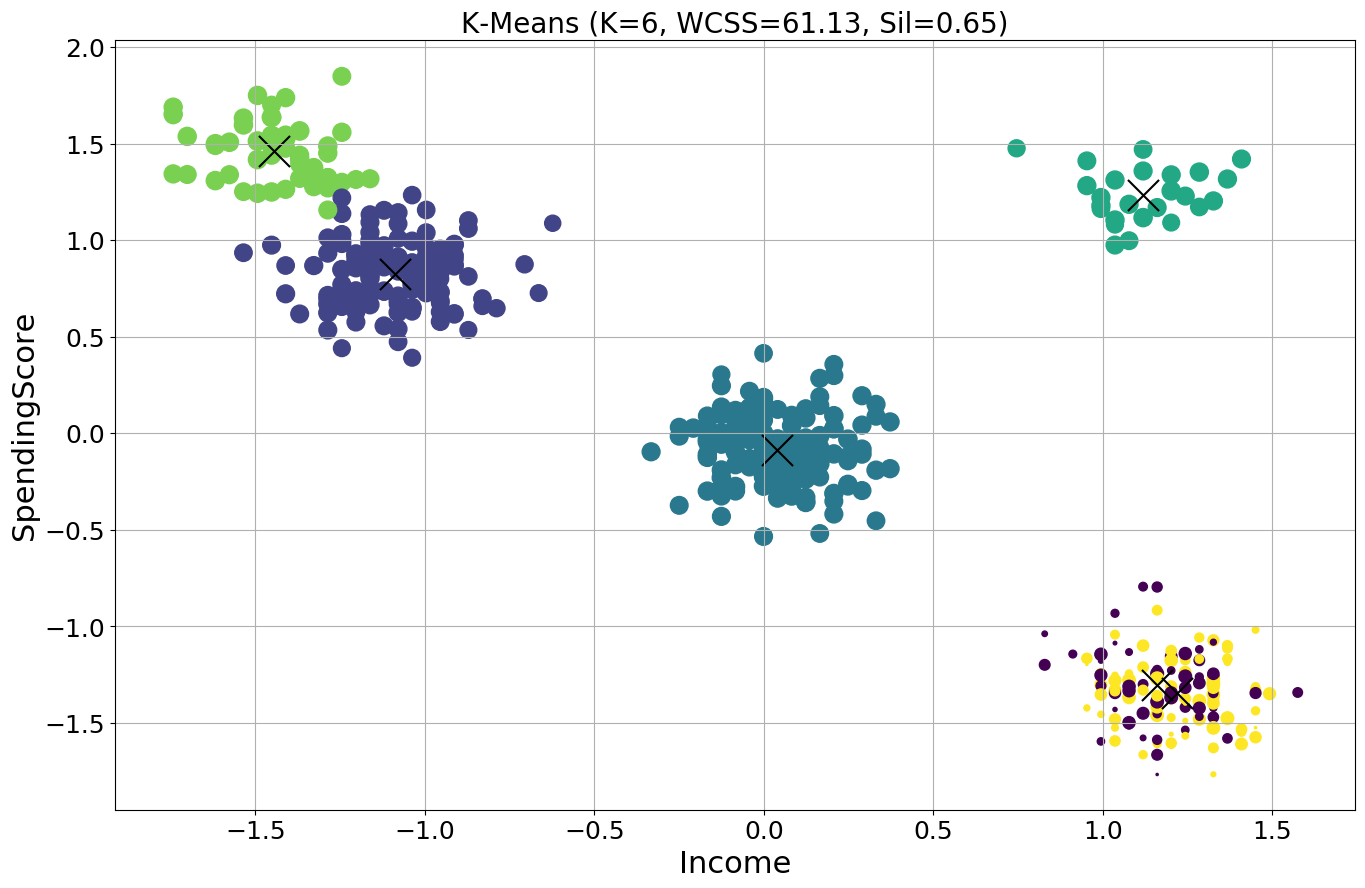

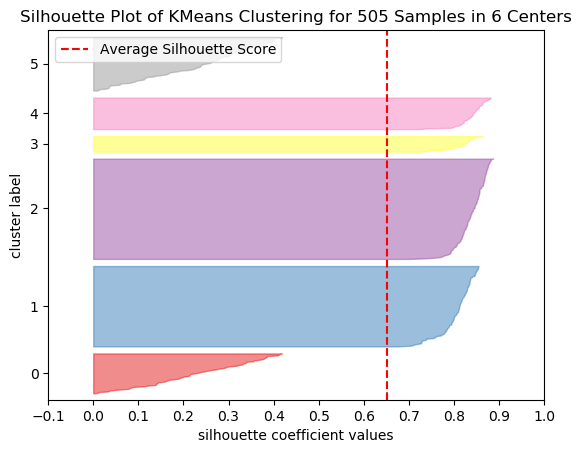

K=6, WCSS=61.13, Sil=0.65


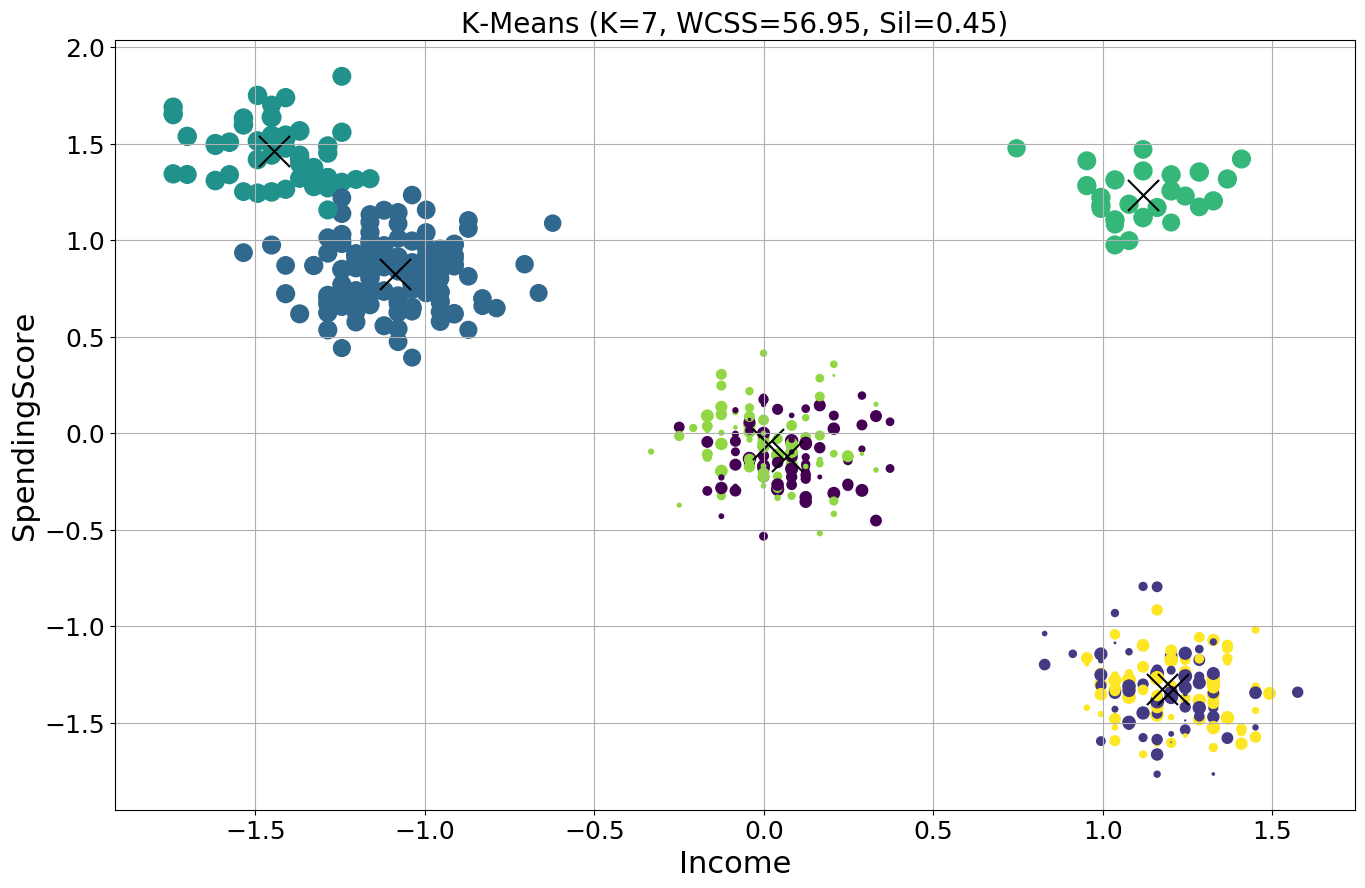

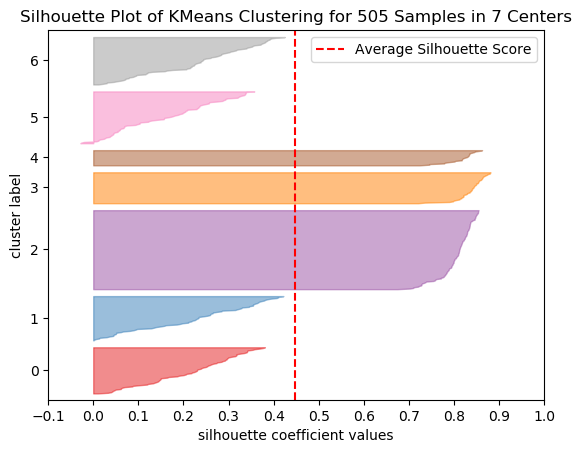

K=7, WCSS=56.95, Sil=0.45


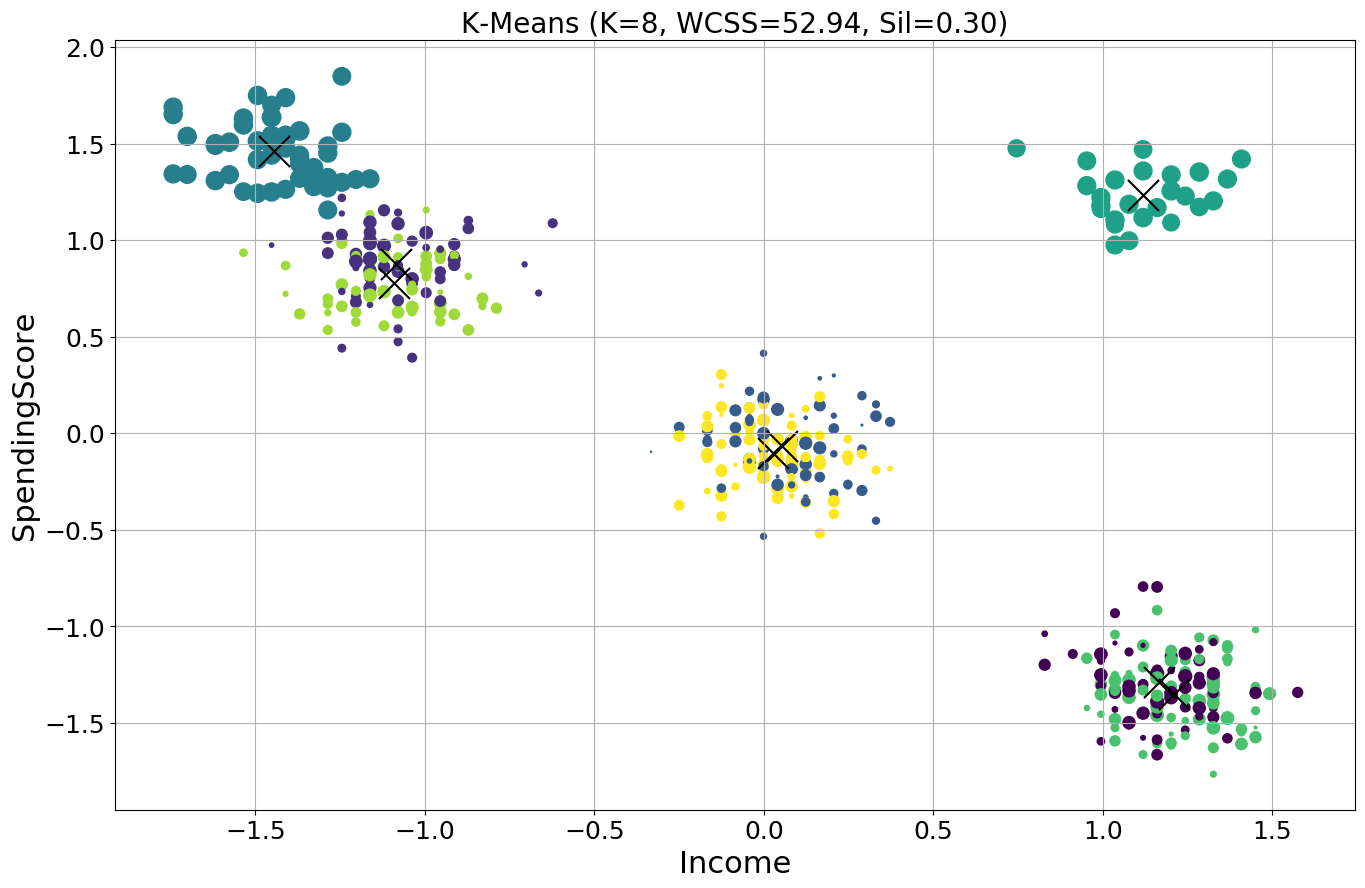

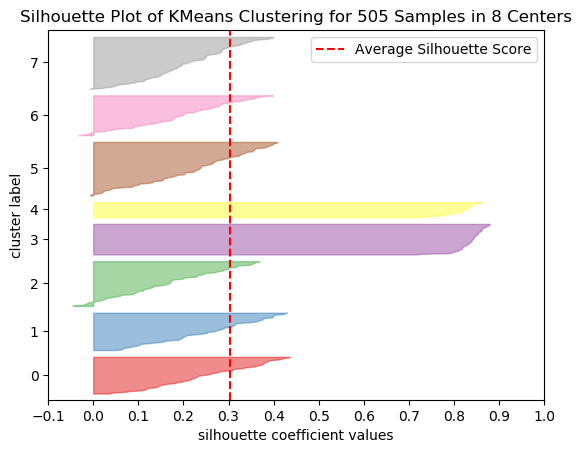

K=8, WCSS=52.94, Sil=0.30


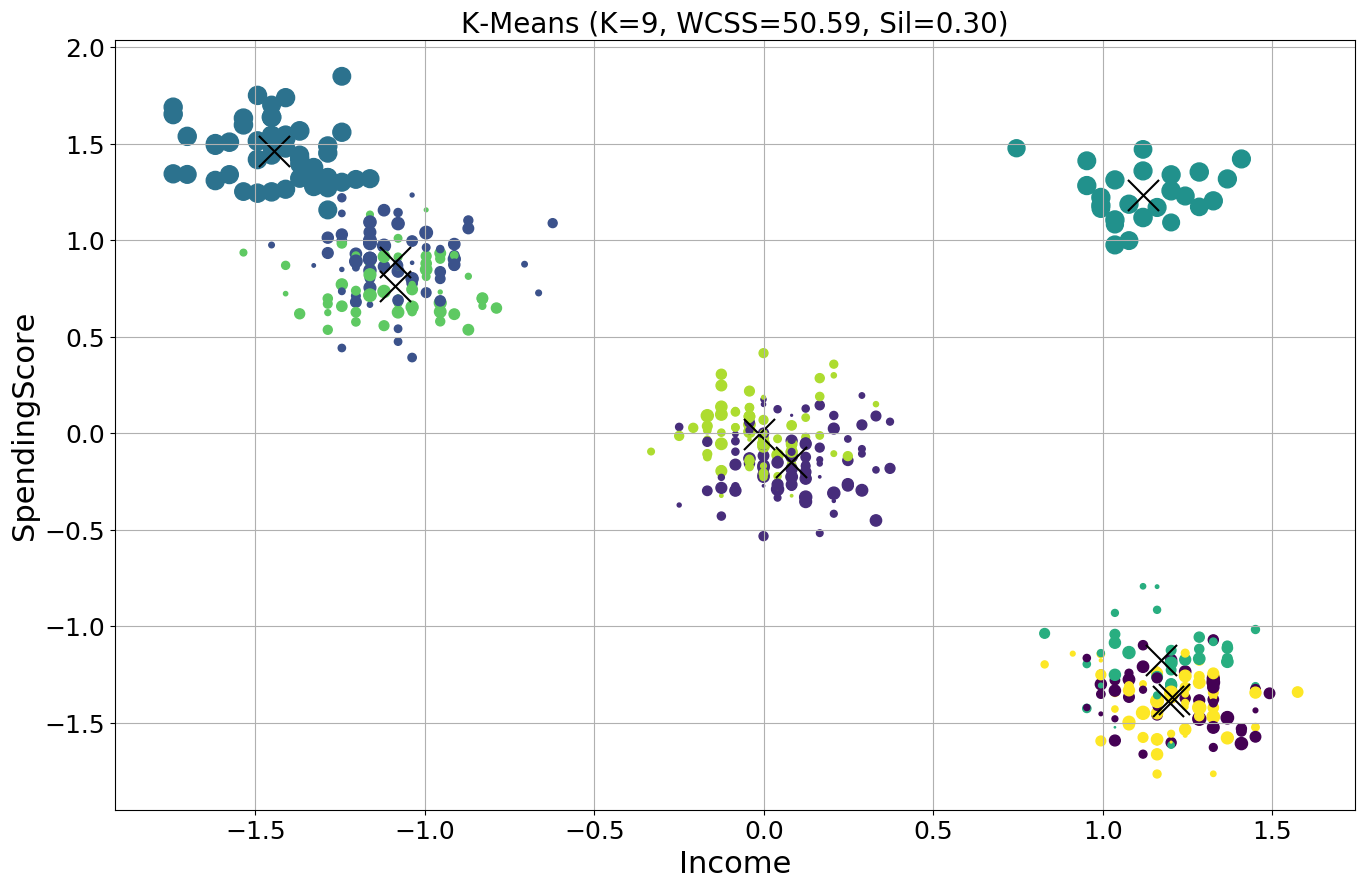

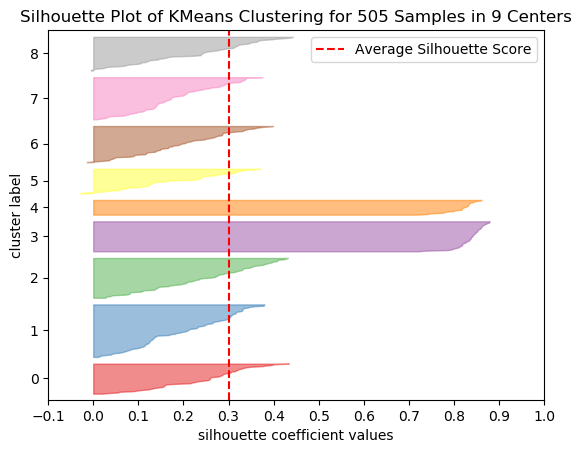

K=9, WCSS=50.59, Sil=0.30


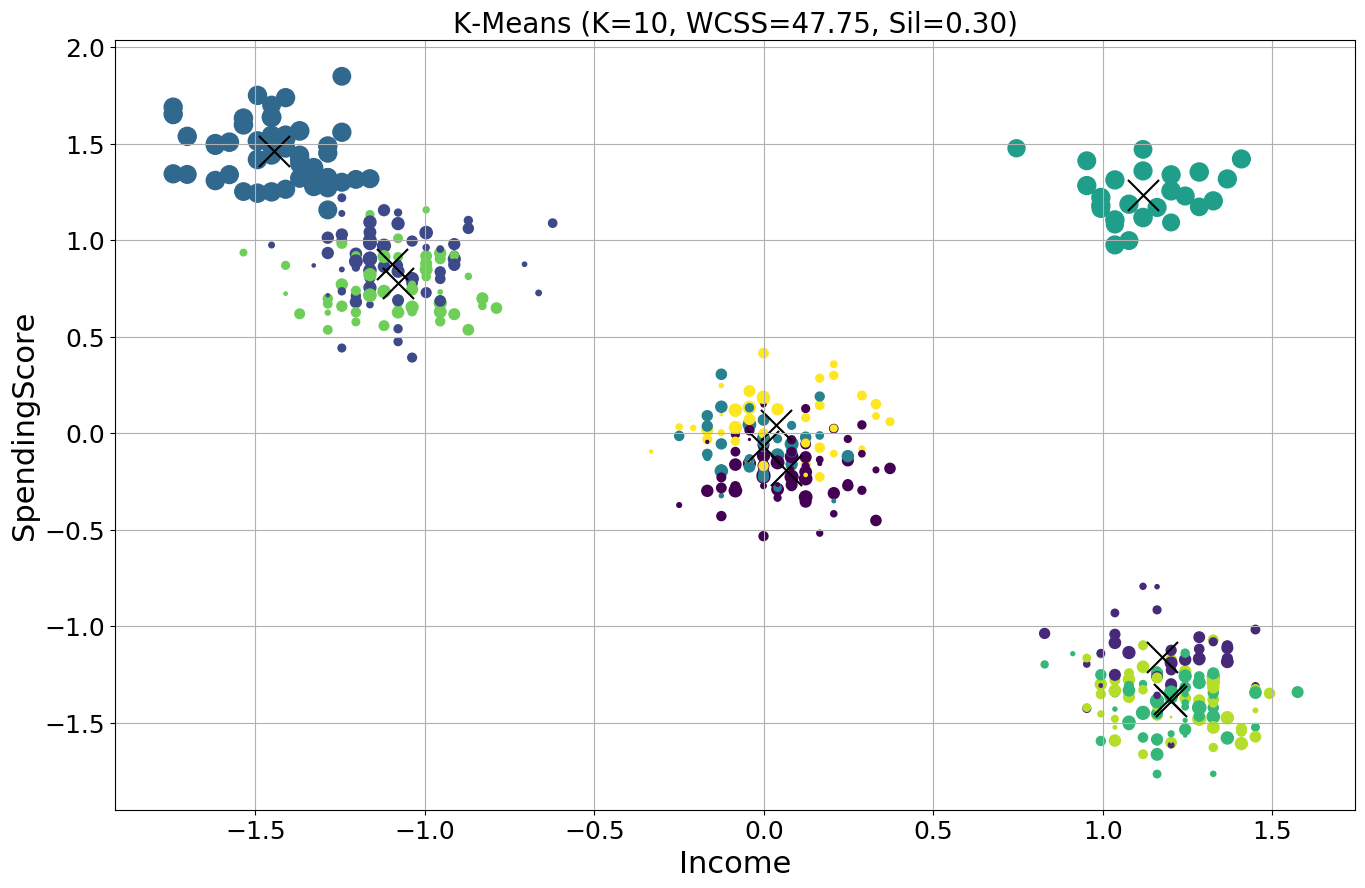

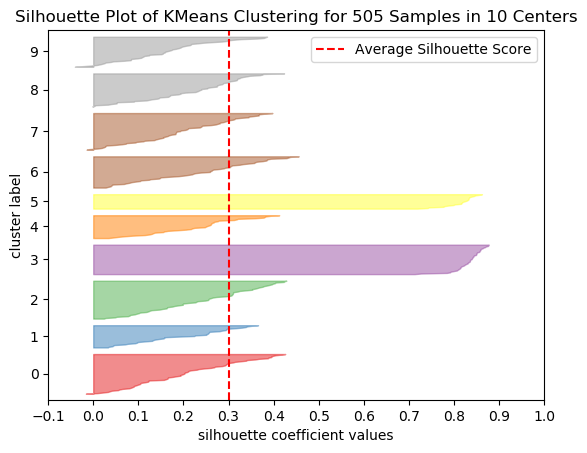

K=10, WCSS=47.75, Sil=0.30


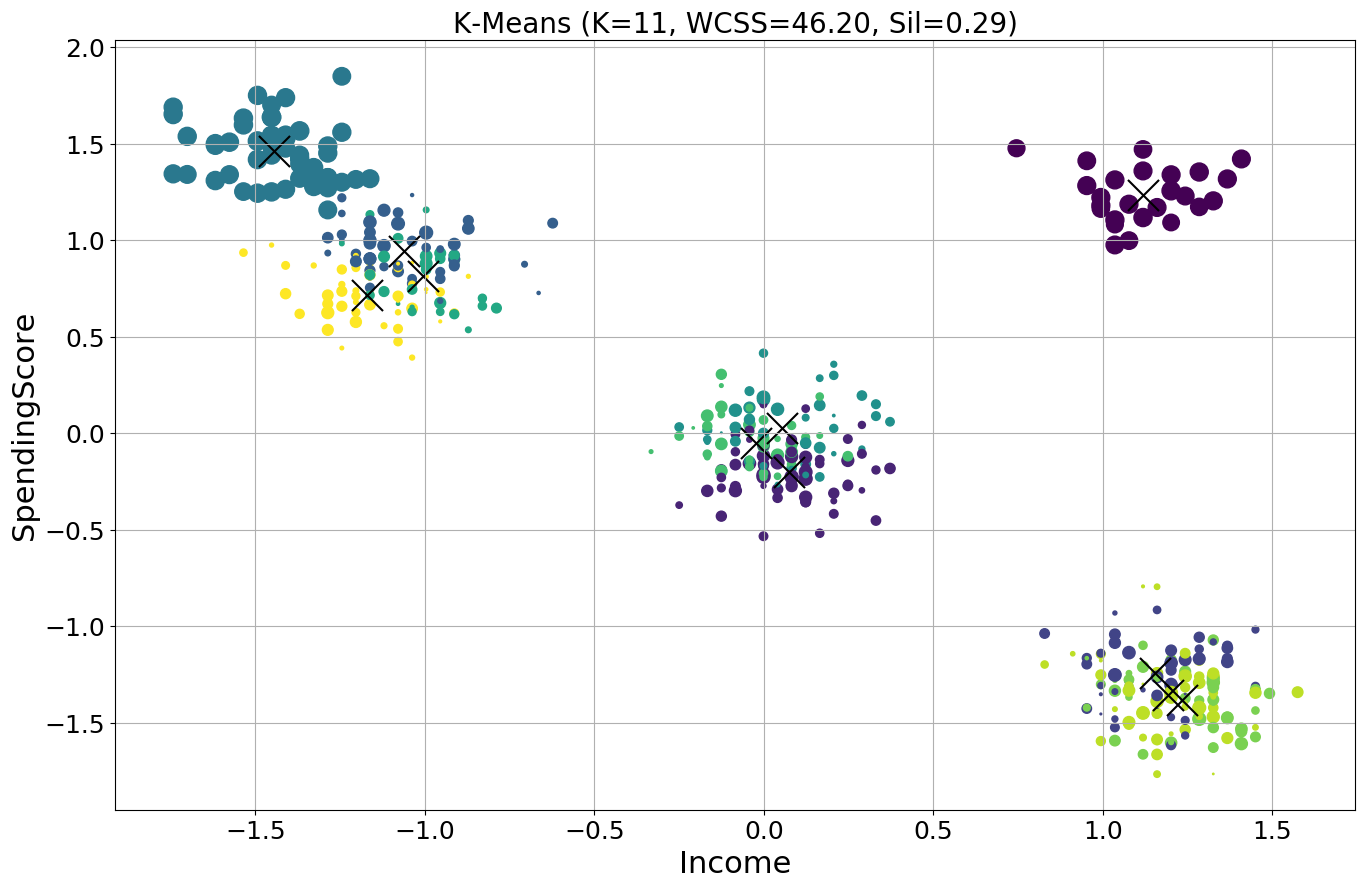

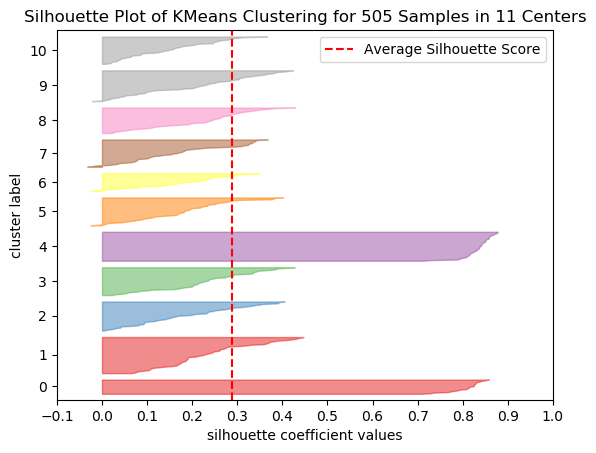

K=11, WCSS=46.20, Sil=0.29


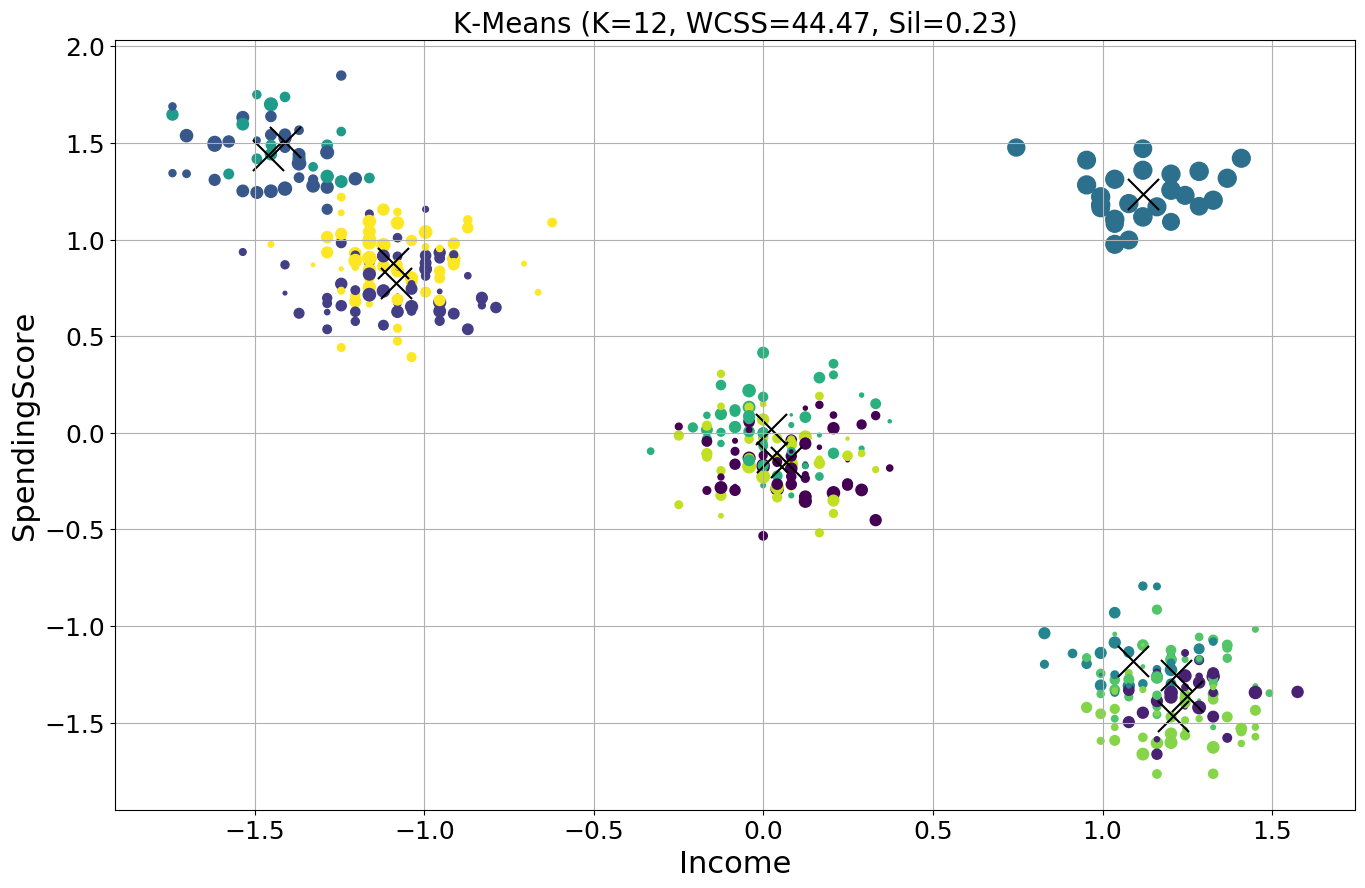

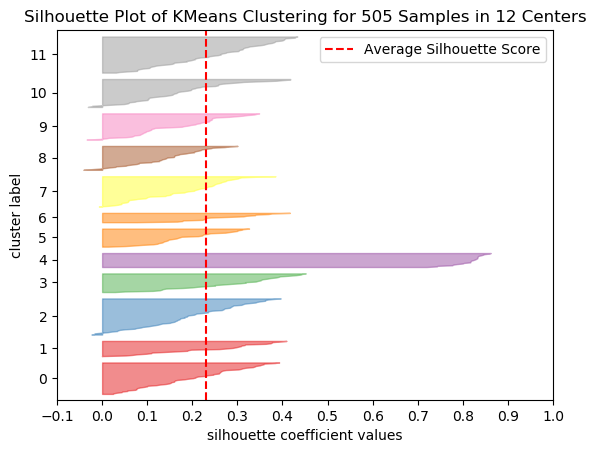

K=12, WCSS=44.47, Sil=0.23


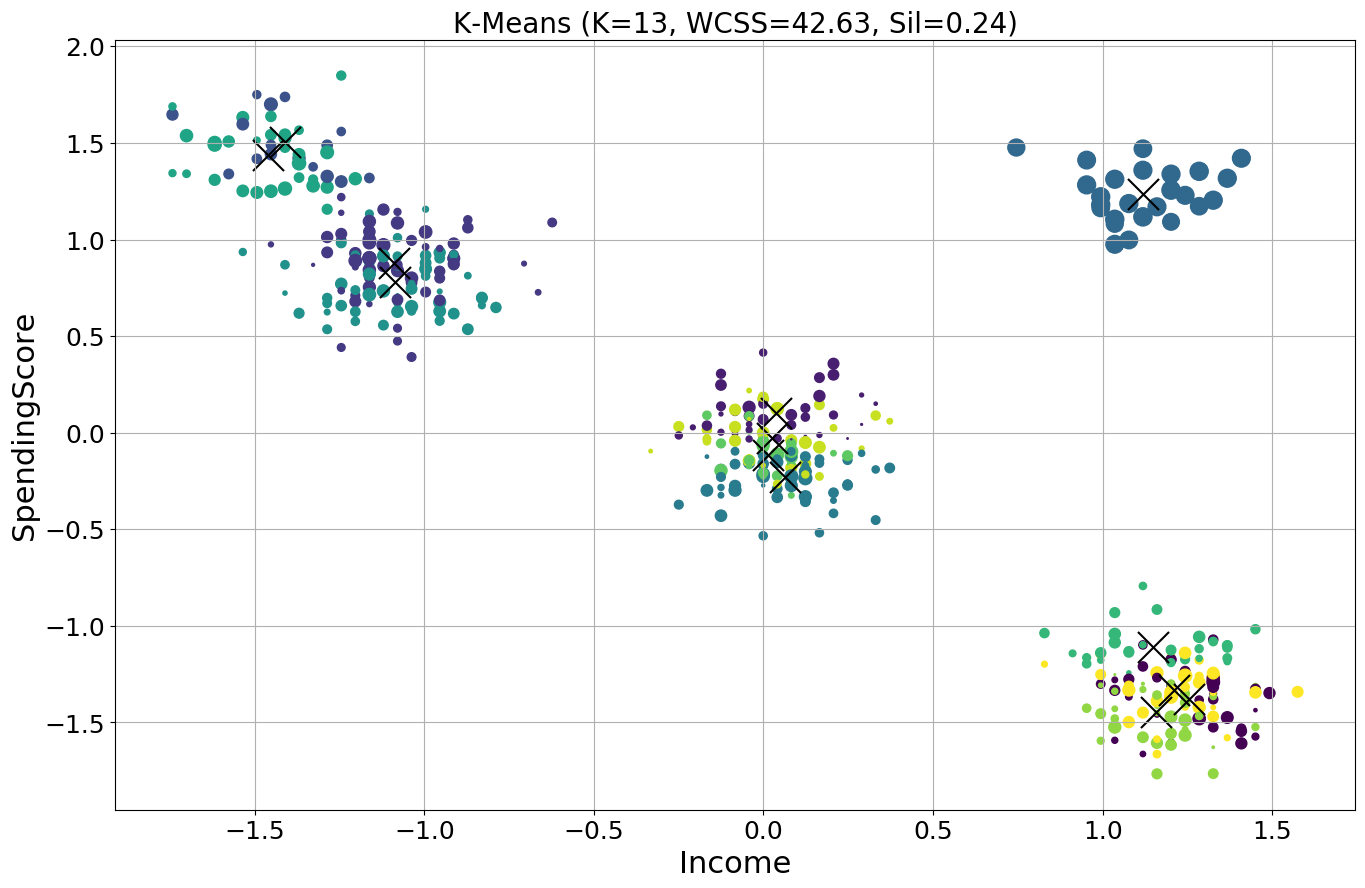

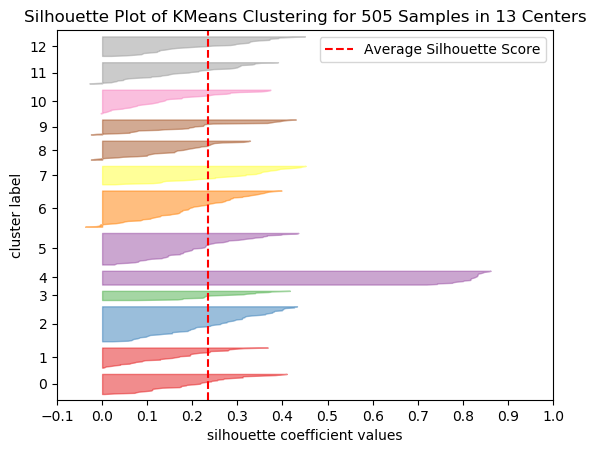

K=13, WCSS=42.63, Sil=0.24


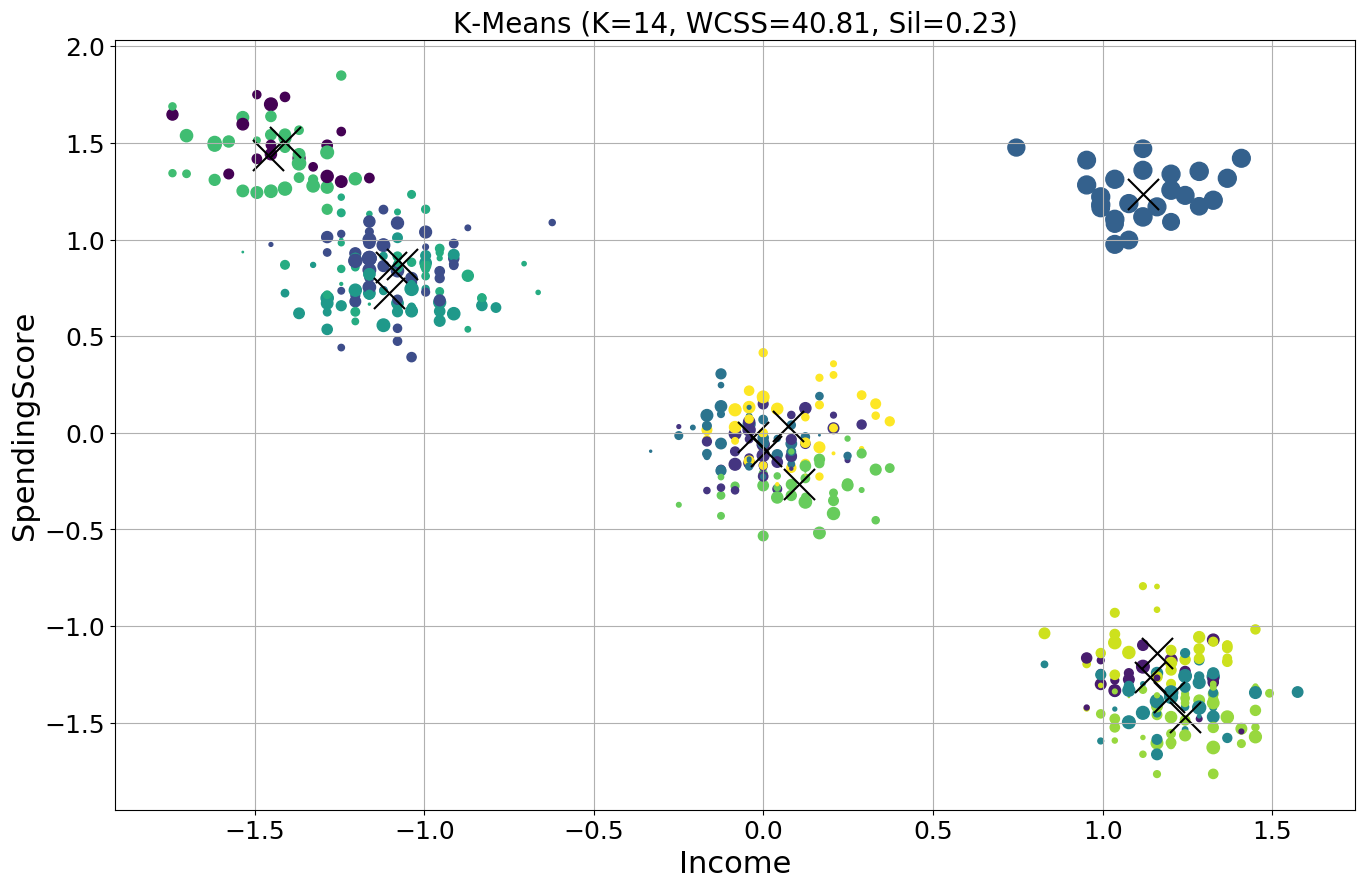

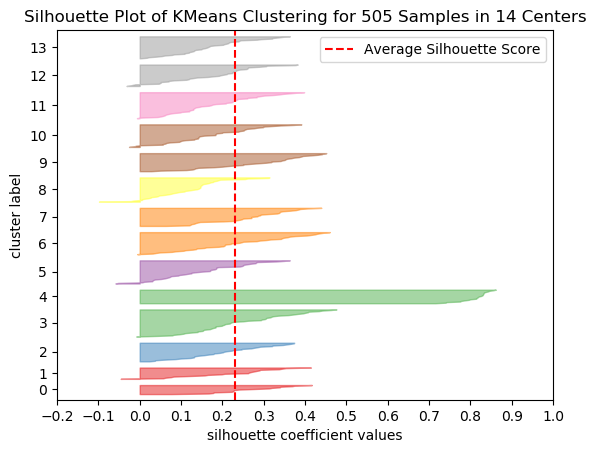

K=14, WCSS=40.81, Sil=0.23


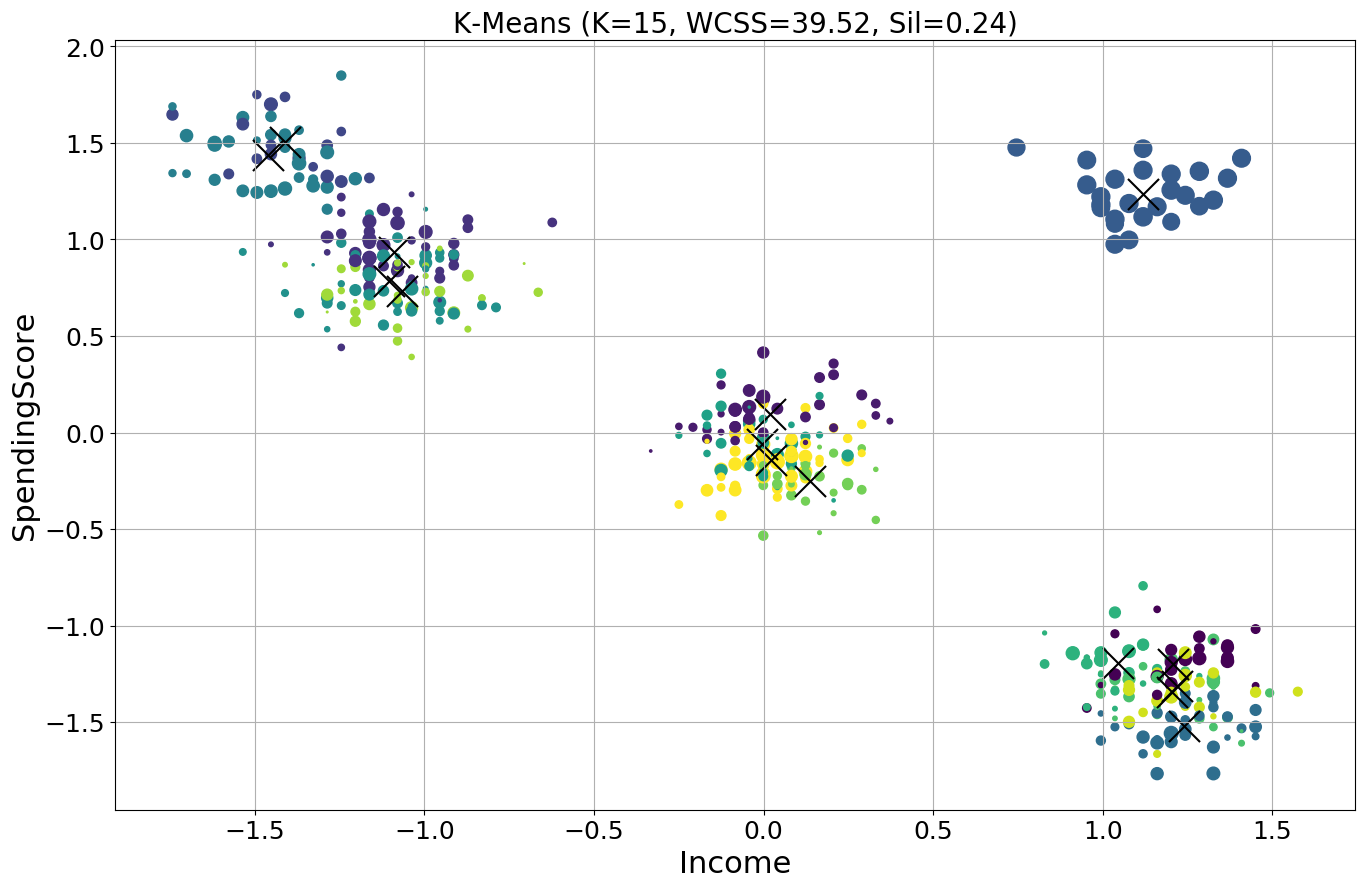

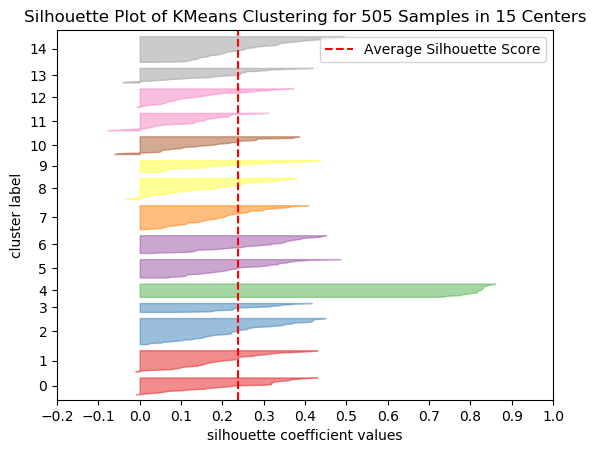

K=15, WCSS=39.52, Sil=0.24


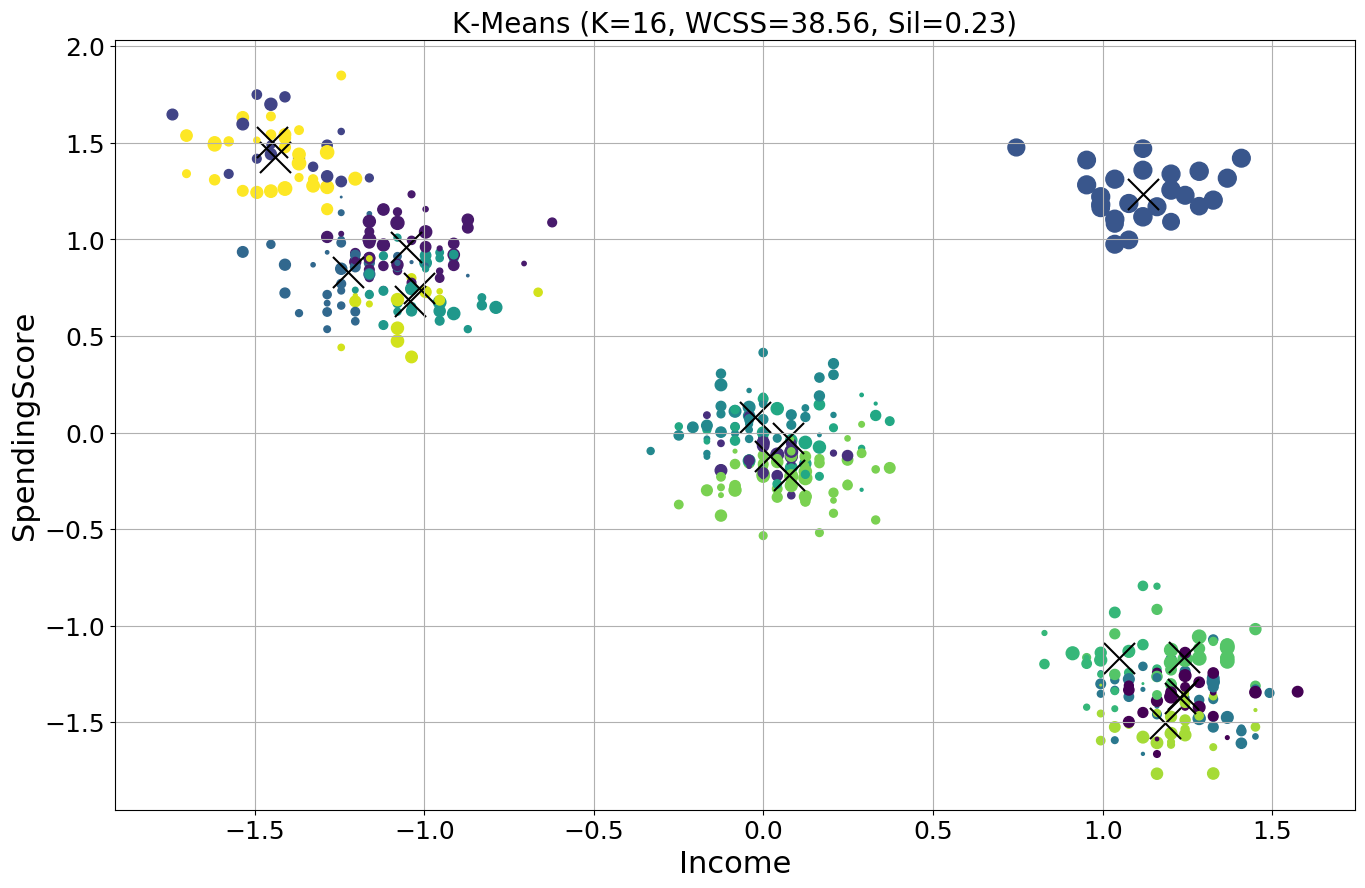

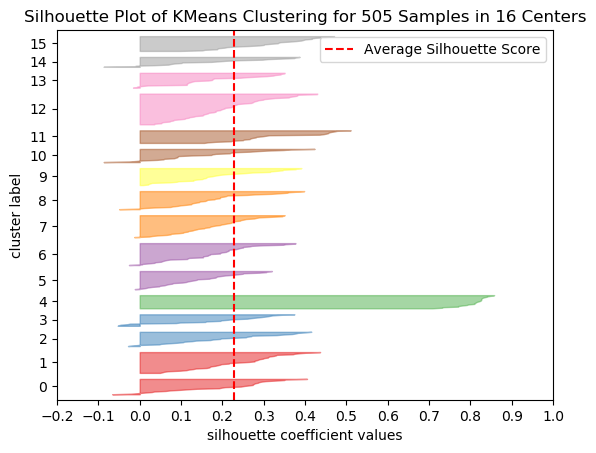

K=16, WCSS=38.56, Sil=0.23


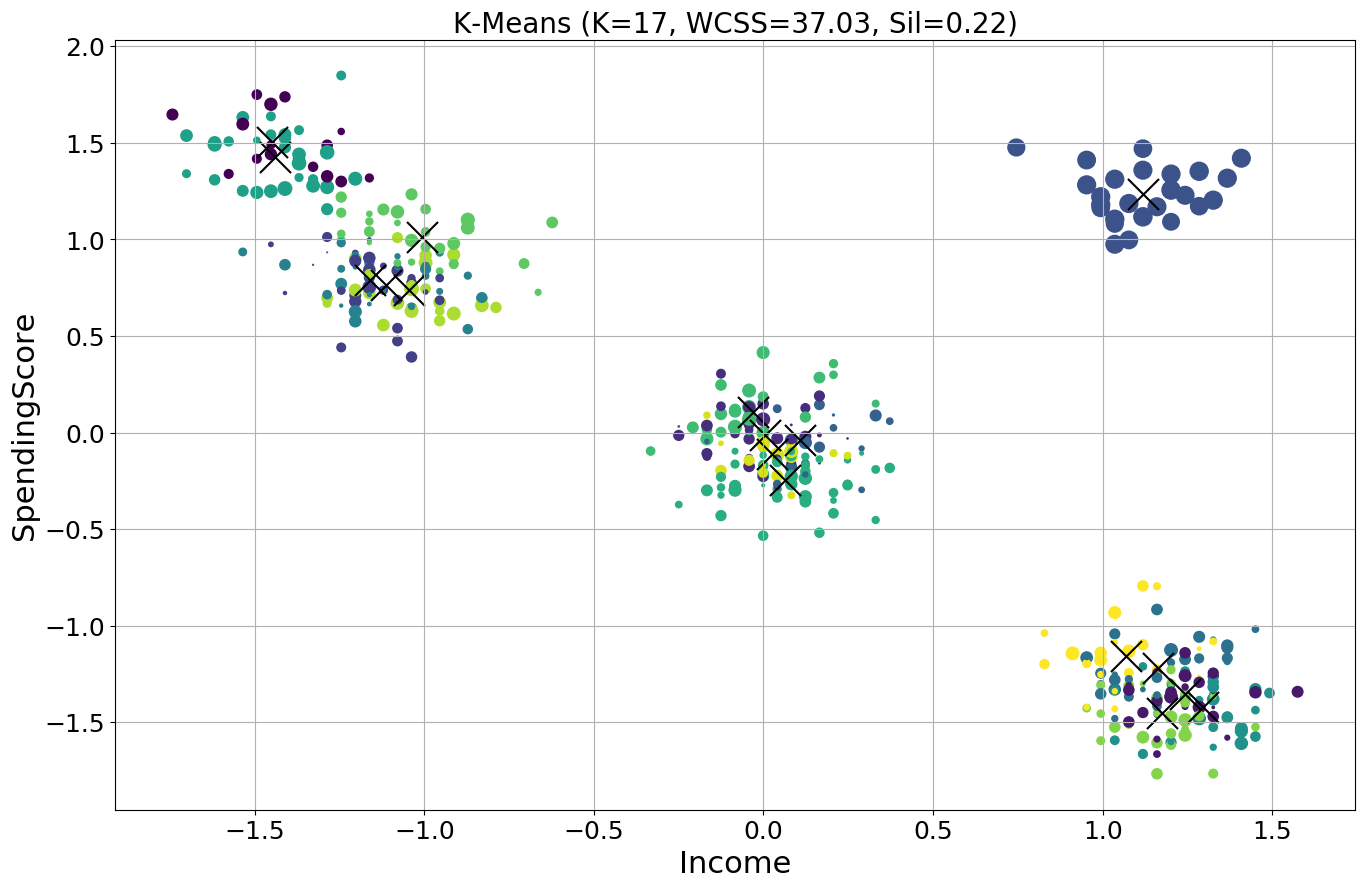

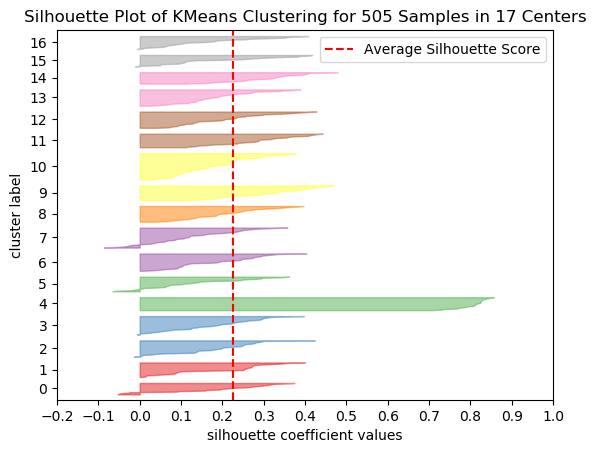

K=17, WCSS=37.03, Sil=0.22


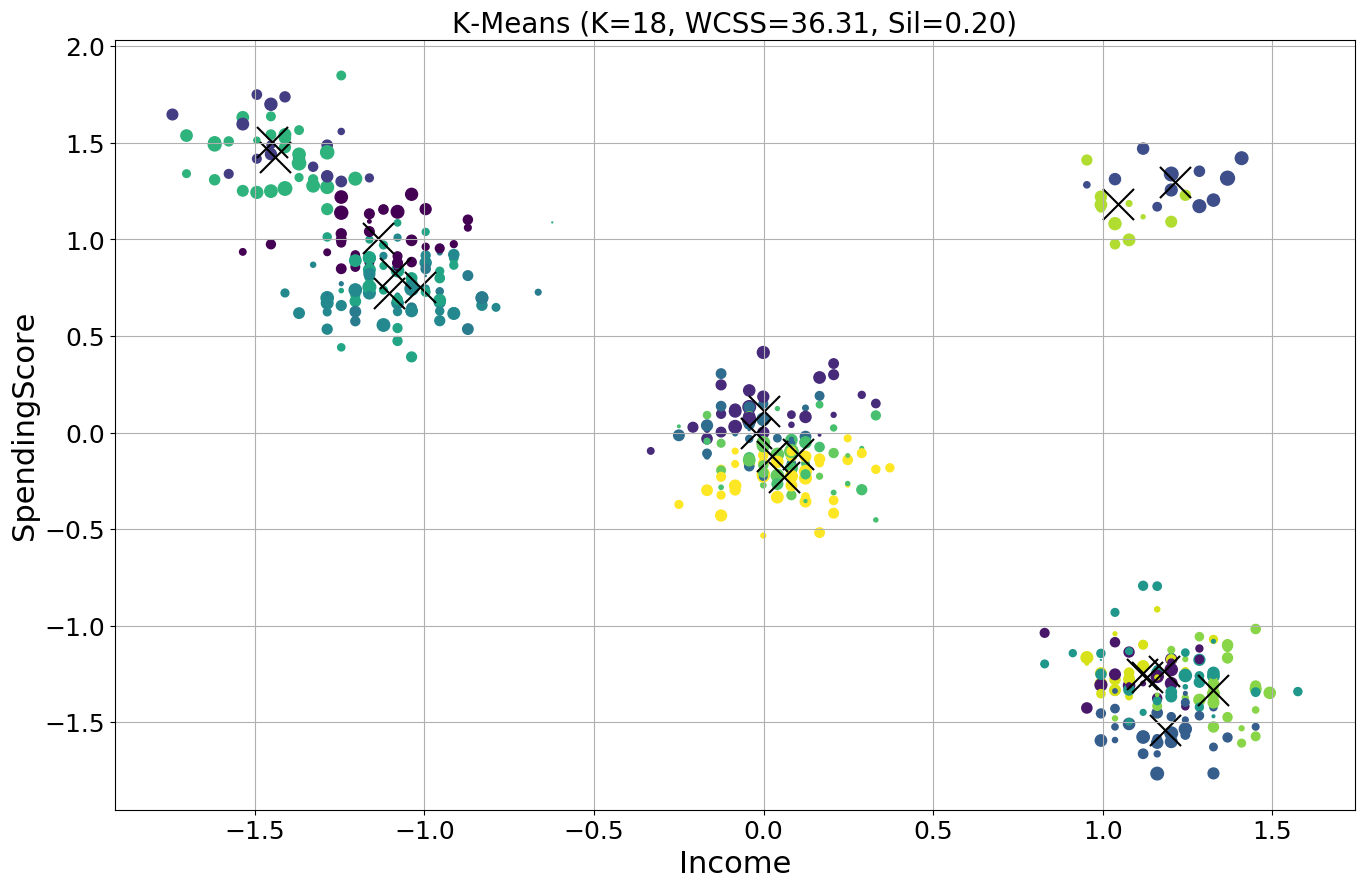

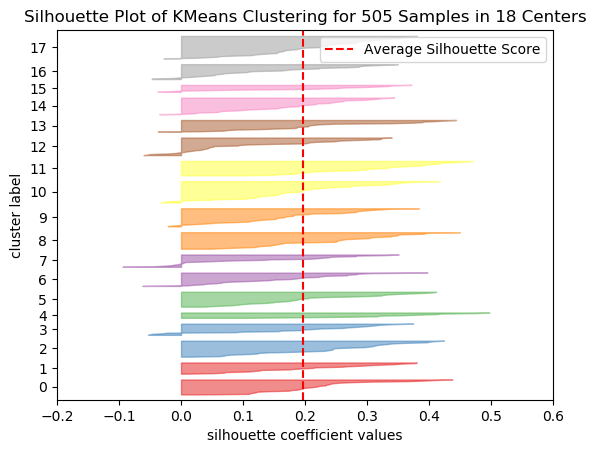

K=18, WCSS=36.31, Sil=0.20


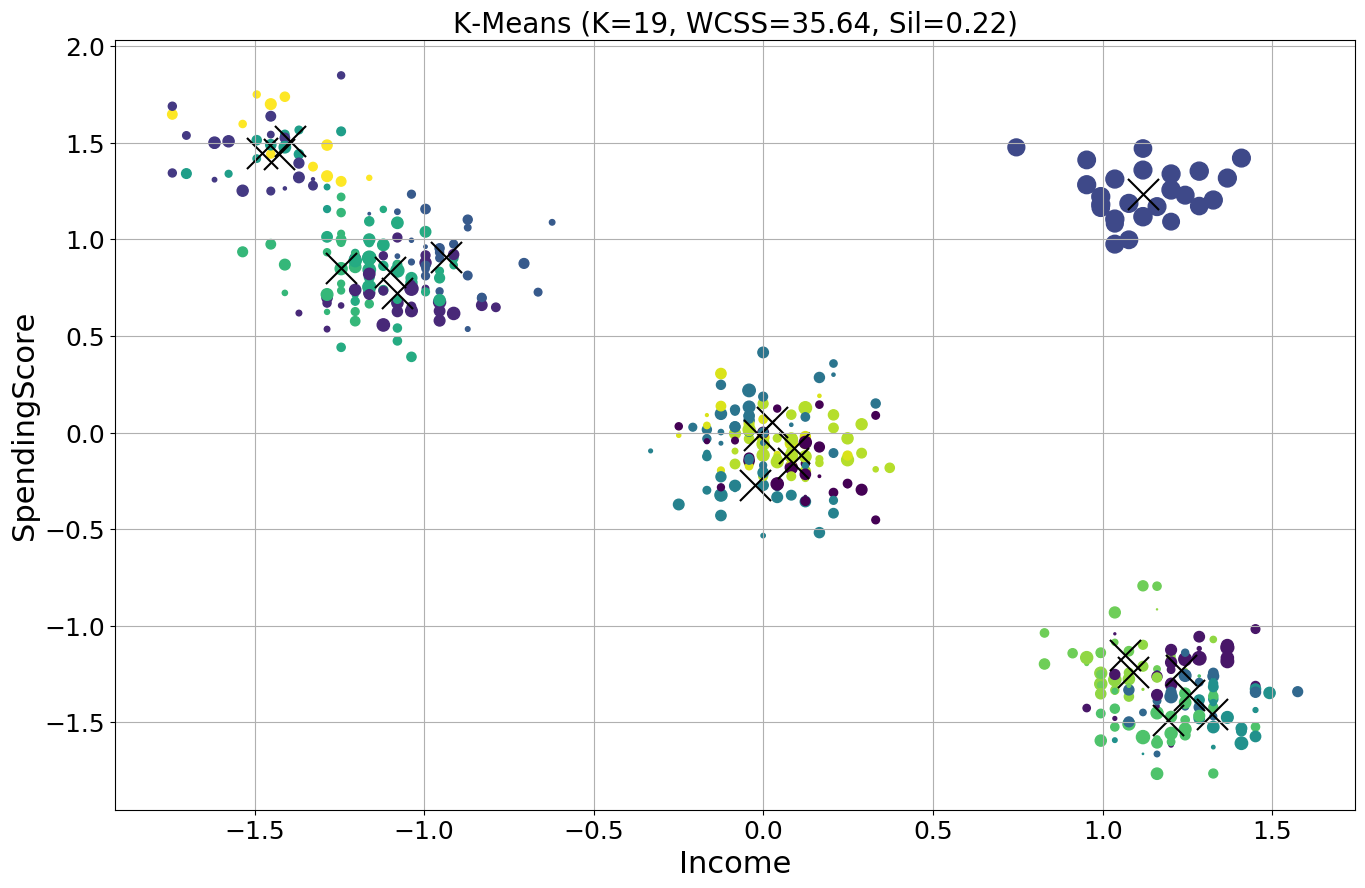

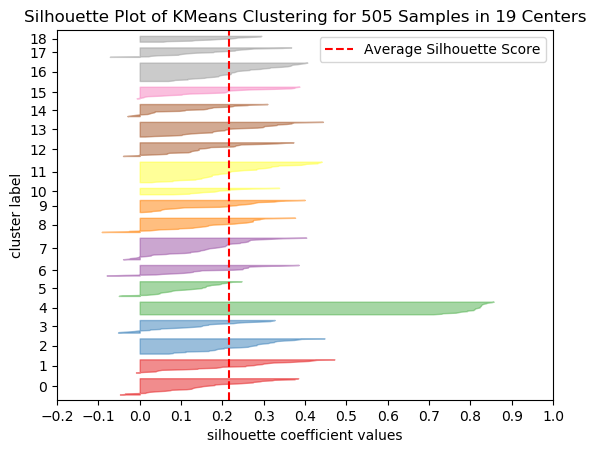

K=19, WCSS=35.64, Sil=0.22


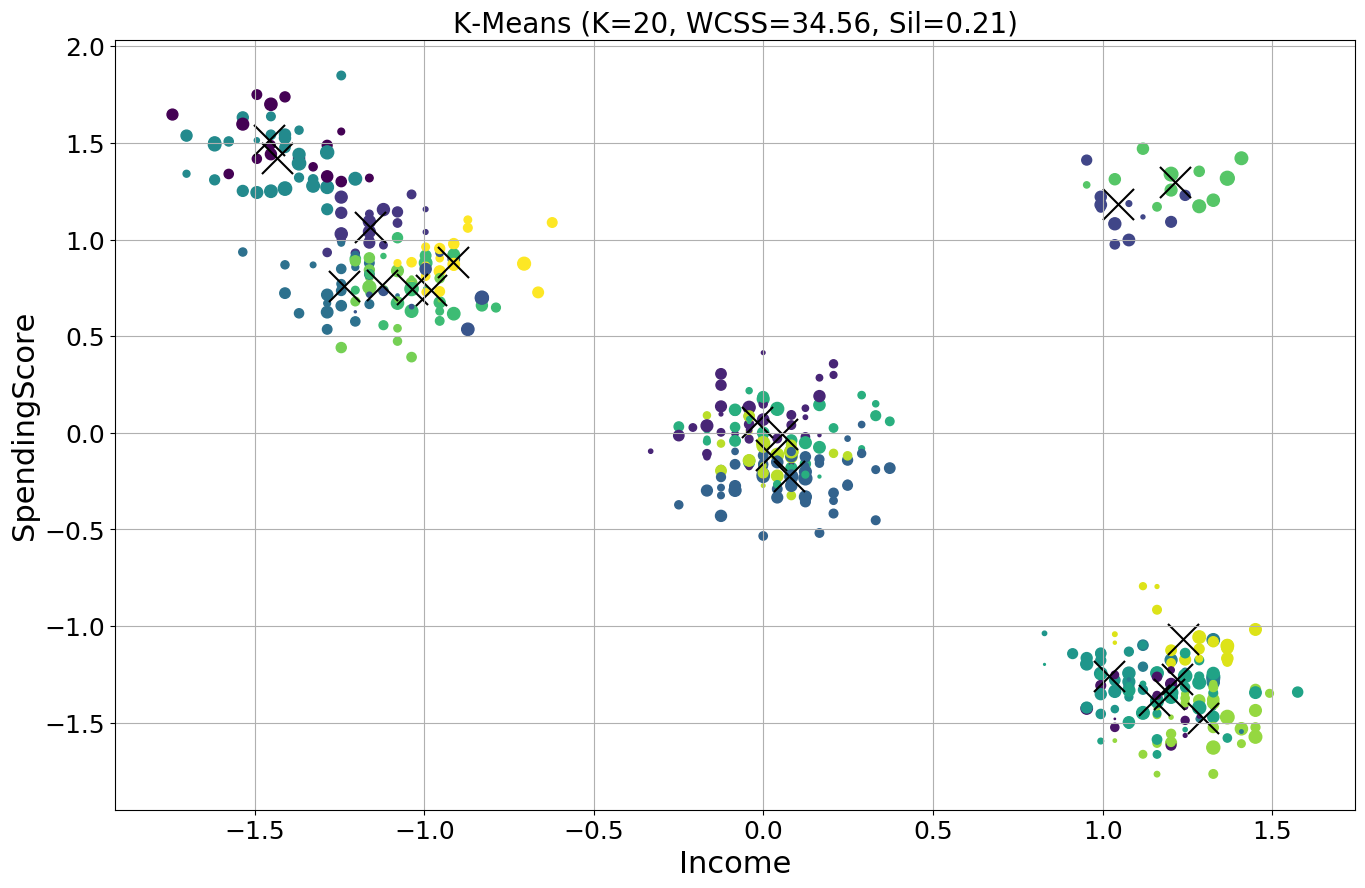

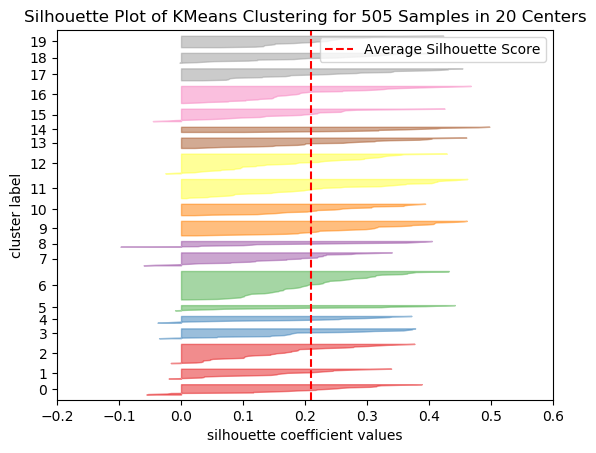

K=20, WCSS=34.56, Sil=0.21


In [128]:
def do_kmeans(scaled_df, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(scaled_df)
    wcss = k_means.inertia_
    sil = silhouette_score(scaled_df, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(scaled_df, k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={}, WCSS={:.2f}, Sil={:.2f})".format(k, wcss, sil), fontsize=20);
    plt.xlabel('Income', fontsize=22);
    plt.ylabel('SpendingScore', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.show()
    
    
    visualizer = SilhouetteVisualizer(k_means)
    visualizer.fit(scaled_df)
    visualizer.poof()
    fig = visualizer.ax.get_figure()
    
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 21):
    do_kmeans(scaled_df, k)